
# Pós tech Fiap - Inteligência Artificial e IA para devs
## Tech Challenge IADT - Fase 1
### Grupo
- Hiago Marques Rubio - RM
- Mylena Ferreira Lacerda - RM

## Diagnóstico de diabetes
### Data set utilizado [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset)


In [1]:
# Import das libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('../data/diabetes_dataset.csv')
print("Número total de linhas no dataset:", len(df))
print("Formato do dataset (linhas, colunas):", df.shape)
print("Número de linhas usando shape[0]:", df.shape[0])
print("\nAs 5 primeiras linhas do dataset:")
df.head()

Número total de linhas no dataset: 100000
Formato do dataset (linhas, colunas): (100000, 31)
Número de linhas usando shape[0]: 100000

As 5 primeiras linhas do dataset:


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


In [3]:
# Verificar informações básicas do dataset
print("Formato do dataset:", df.shape)
print("\nNomes das colunas:")
print(df.columns.tolist())
print("\nTipos de dados:")
print(df.dtypes)

Formato do dataset: (100000, 31)

Nomes das colunas:
['age', 'gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'glucose_fasting', 'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes']

Tipos de dados:
age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_

In [4]:
# Verificar valores únicos das principais variáveis categóricas
print("Valores únicos - diagnosed_diabetes:", df['diagnosed_diabetes'].unique())
print("Valores únicos - diabetes_stage:", df['diabetes_stage'].unique())
print("Valores únicos - gender:", df['gender'].unique())
print("Valores únicos - smoking_status:", df['smoking_status'].unique())
print("\nResumo estatístico do diabetes_risk_score:")
print(df['diabetes_risk_score'].describe())

Valores únicos - diagnosed_diabetes: [1 0]
Valores únicos - diabetes_stage: ['Type 2' 'No Diabetes' 'Pre-Diabetes' 'Gestational' 'Type 1']
Valores únicos - gender: ['Male' 'Female' 'Other']
Valores únicos - smoking_status: ['Never' 'Former' 'Current']

Resumo estatístico do diabetes_risk_score:
count    100000.000000
mean         30.222362
std           9.061505
min           2.700000
25%          23.800000
50%          29.000000
75%          35.600000
max          67.200000
Name: diabetes_risk_score, dtype: float64


In [ ]:
missing_values = df.isnull().sum()
print("Colunas com valores ausentes:")
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("Nenhum valor ausente encontrado!")

In [6]:
print(f"\n=== VARIÁVEIS CATEGÓRICAS E SEUS VALORES ===")

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} valores únicos -> {df[col].unique()}")


=== VARIÁVEIS CATEGÓRICAS E SEUS VALORES ===
gender: 3 valores únicos -> ['Male' 'Female' 'Other']
ethnicity: 5 valores únicos -> ['Asian' 'White' 'Hispanic' 'Black' 'Other']
education_level: 4 valores únicos -> ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
income_level: 5 valores únicos -> ['Lower-Middle' 'Middle' 'Low' 'Upper-Middle' 'High']
employment_status: 4 valores únicos -> ['Employed' 'Unemployed' 'Retired' 'Student']
smoking_status: 3 valores únicos -> ['Never' 'Former' 'Current']
diabetes_stage: 5 valores únicos -> ['Type 2' 'No Diabetes' 'Pre-Diabetes' 'Gestational' 'Type 1']


# Análise exploratória dos dados

## Visão geral do dataset
O dataset contém **100.000 registros** com **31 variáveis** abrangendo diferentes aspectos da saúde e estilo de vida dos pacientes. A análise inicial revela a presença de múltiplos tipos de dados que necessitam de tratamento específico para modelagem de machine learning. Abaixo uma descrição dos dados.

## Categorização das variáveis por tipo:

### Variáveis Categóricas (strings - object):
- **Demográficas**: `gender`, `ethnicity`
- **Socioeconômicas**: `education_level`, `income_level`, `employment_status`
- **Comportamentais**: `smoking_status`
- **Clínica**: `diabetes_stage`

### Variáveis Numéricas Discretas (int64):
- **Demográficas**: `age`
- **Estilo de vida**: `alcohol_consumption_per_week`, `physical_activity_minutes_per_week`
- **Histórico médico**: `family_history_diabetes`, `hypertension_history`, `cardiovascular_history`
- **Sinais vitais**: `systolic_bp`, `diastolic_bp`, `heart_rate`
- **Exames laboratoriais**: `cholesterol_total`, `hdl_cholesterol`, `ldl_cholesterol`, `triglycerides`, `glucose_fasting`, `glucose_postprandial`
- **Variável-alvo**: `diagnosed_diabetes`

### Variáveis Numéricas Contínuas (float64):
- **Estilo de vida**: `diet_score`, `sleep_hours_per_day`, `screen_time_hours_per_day`
- **Antropométricas**: `bmi`, `waist_to_hip_ratio`
- **Exames laboratoriais**: `insulin_level`, `hba1c`
- **Score de risco**: `diabetes_risk_score`

## Necessidades de pré-processamento identificadas:

1. **Encoding de variáveis categóricas**: As 7 variáveis categóricas precisarão ser convertidas para formato numérico (One-Hot Encoding, Label Encoding, ou Target Encoding)

2. **Normalização/Padronização**: Variáveis numéricas possuem escalas muito diferentes (ex: idade vs. minutos de atividade física), necessitando normalização

3. **Análise de valores ausentes**: Verificar presença de NaN, especialmente nas variáveis float64

4. **Detecção de outliers**: Principalmente em variáveis clínicas e antropométricas

5. **Análise de correlação**: Identificar multicolinearidade entre variáveis clínicas relacionadas

## Variáveis-alvo para modelagem:
- **`diagnosed_diabetes`** (0/1): Classificação binária supervisionada
- **`diabetes_stage`** (5 categorias): Classificação multiclasse supervisionada  
- **`diabetes_risk_score`** (contínua): Regressão ou clustering não supervisionado  

In [7]:
# Estatísticas Descritivas Completas
print("="*80)
print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS")
print("="*80)

# Separar variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nTotal de variáveis numéricas: {len(numeric_cols)}")

# Estatísticas básicas
desc_stats = df[numeric_cols].describe()
print("\nEstatísticas Básicas:")
print(desc_stats)

# Estatísticas de forma da distribuição
print("\n" + "="*80)
print("ANÁLISE DE DISTRIBUIÇÃO (Assimetria e Curtose)")
print("="*80)

additional_stats = pd.DataFrame({
    'Média': df[numeric_cols].mean(),
    'Mediana': df[numeric_cols].median(),
    'Desvio Padrão': df[numeric_cols].std(),
    'Assimetria': df[numeric_cols].skew(),
    'Curtose': df[numeric_cols].kurtosis()
})

print("\nInterpretação:")
print("• Assimetria próxima de 0: distribuição simétrica")
print("• Assimetria > 0: cauda à direita (valores altos)")
print("• Curtose > 0: distribuição mais pontiaguda que a normal\n")

print(additional_stats.round(3))

ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS

Total de variáveis numéricas: 24

Estatísticas Básicas:
                age  alcohol_consumption_per_week  \
count  100000.00000                 100000.000000   
mean       50.12041                      2.003670   
std        15.60460                      1.417779   
min        18.00000                      0.000000   
25%        39.00000                      1.000000   
50%        50.00000                      2.000000   
75%        61.00000                      3.000000   
max        90.00000                     10.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       100000.000000  100000.000000        100000.000000   
mean                           118.911640       5.994787             6.997818   
std                             84.409662       1.780954             1.094622   
min                              0.000000       0.000000             3.000000   
25%          

Total de variáveis analisadas: 23



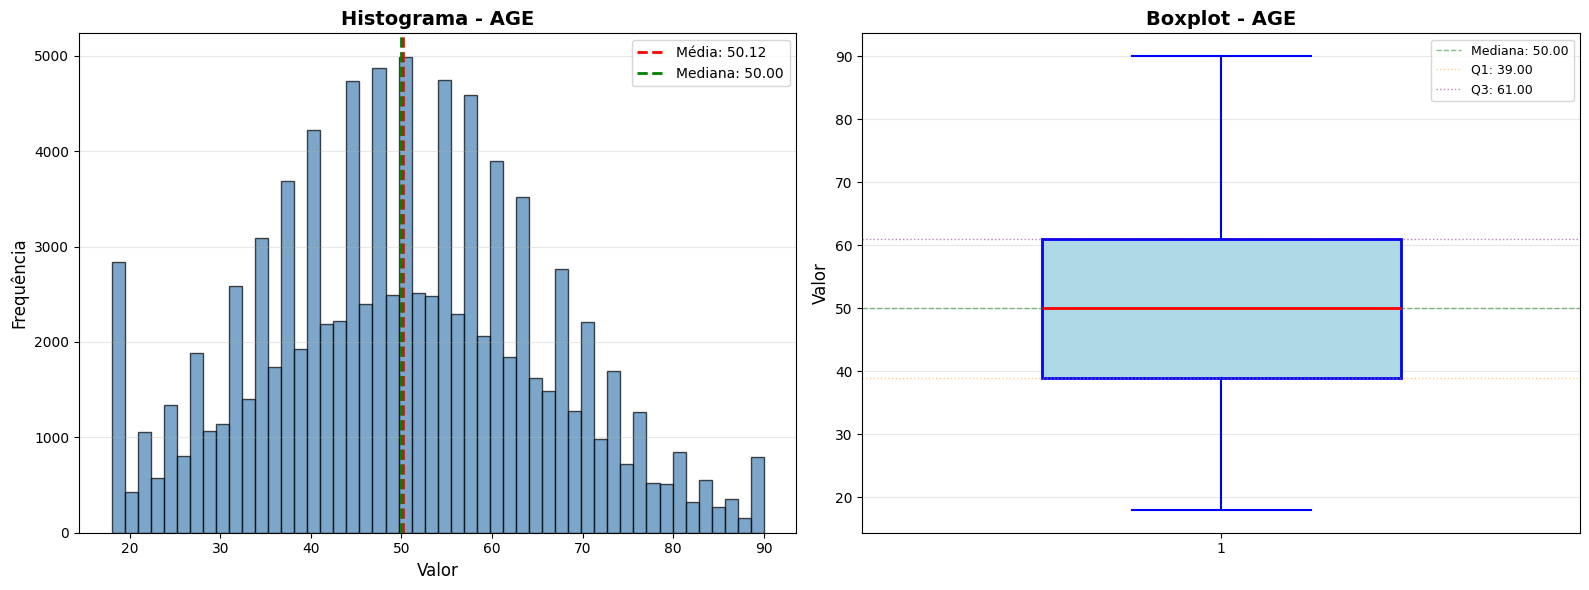


IDADE (anos)

Distribuição da idade dos pacientes no estudo

ESTATÍSTICAS:
   - Média: 50.12
   - Mediana: 50.00
   - Desvio Padrão: 15.60
   - Assimetria: 0.083
   - Mínimo: 18.00
   - Máximo: 90.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 39.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 50.00 - divide os dados ao meio
   - Q3 (75%): 61.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 22.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 6.00
   - Limite superior: 94.00
   - Número de outliers: 0 (0.00% dos dados)
   - Nenhum outlier detectado - distribuição bem comportada

DISTRIBUIÇÃO: Simétrica
   Média ≈ Mediana indica distribuição equilibrada entre todas as faixas etárias.
   
INTERPRETAÇÃO: População adulta bem distribuída (18-90 anos). O risco de diabetes 
   aumenta com a idade, sendo este um importante preditor pa

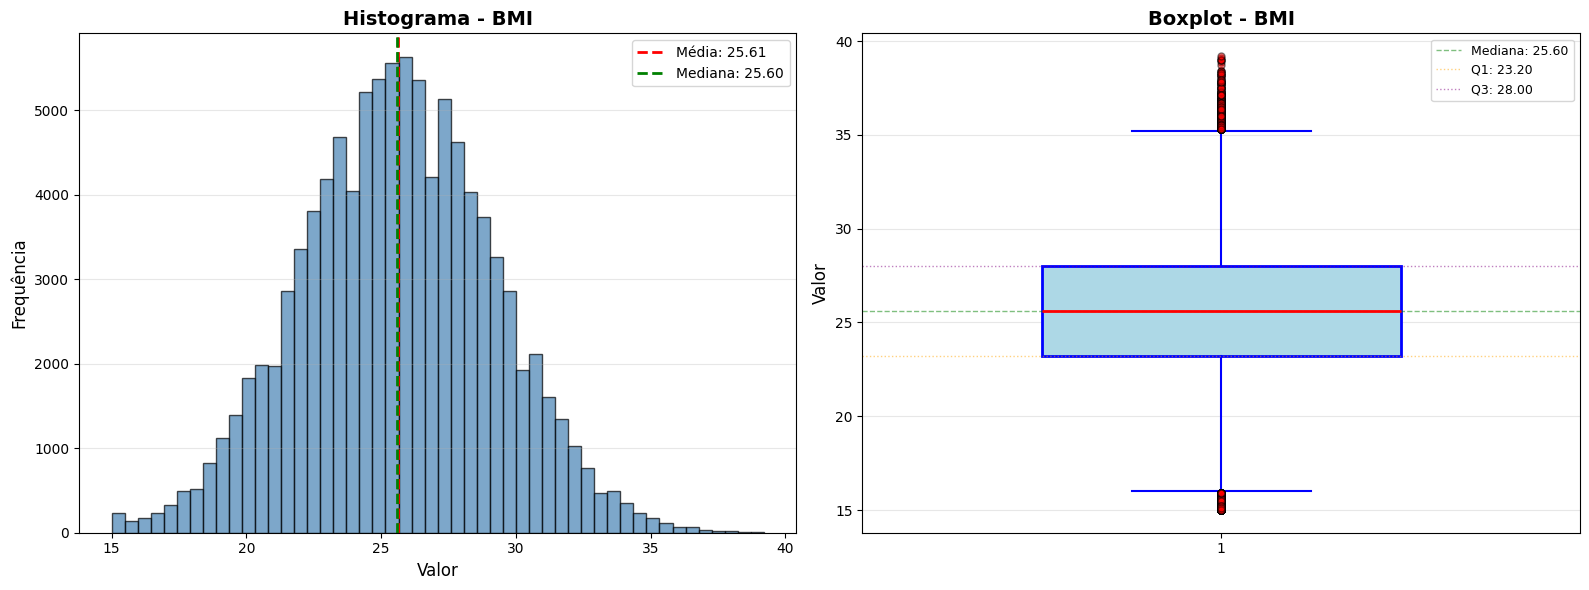


IMC - Índice de Massa Corporal (kg/m²)

Referência: Normal: 18.5-24.9 | Sobrepeso: 25-29.9 | Obesidade: ≥30

ESTATÍSTICAS:
   - Média: 25.61
   - Mediana: 25.60
   - Desvio Padrão: 3.59
   - Assimetria: 0.006
   - Mínimo: 15.00
   - Máximo: 39.20

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 23.20 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 25.60 - divide os dados ao meio
   - Q3 (75%): 28.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 4.80 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 16.00
   - Limite superior: 35.20
   - Número de outliers: 744 (0.74% dos dados)
   - Outliers detectados: valores fora do intervalo [16.00, 35.20]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Perfeitamente simétrica
   Média: 25.6 está no limiar entre normal e sobrepeso.
   
ALERTA: População com IMC elevado - fator de risco impo

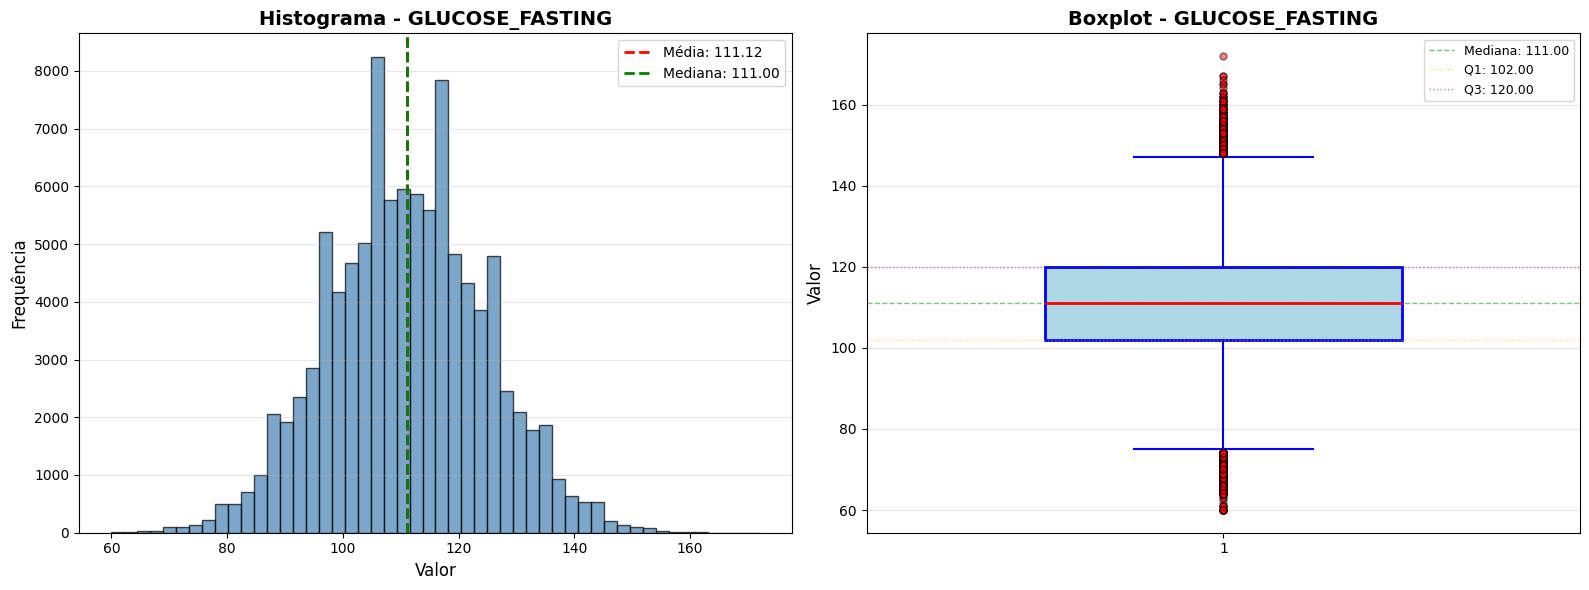


GLICOSE EM JEJUM (mg/dL)

Referência: Normal: <100 | Pré-diabetes: 100-125 | Diabetes: ≥126

ESTATÍSTICAS:
   - Média: 111.12
   - Mediana: 111.00
   - Desvio Padrão: 13.60
   - Assimetria: 0.046
   - Mínimo: 60.00
   - Máximo: 172.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 102.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 111.00 - divide os dados ao meio
   - Q3 (75%): 120.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 18.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 75.00
   - Limite superior: 147.00
   - Número de outliers: 745 (0.74% dos dados)
   - Outliers detectados: valores fora do intervalo [75.00, 147.00]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Simétrica
   Média: 111.1 mg/dL está na ZONA PRÉ-DIABÉTICA.
   
ALERTA CRÍTICO: Metade da população está acima de 111 mg/dL, indicando controle 


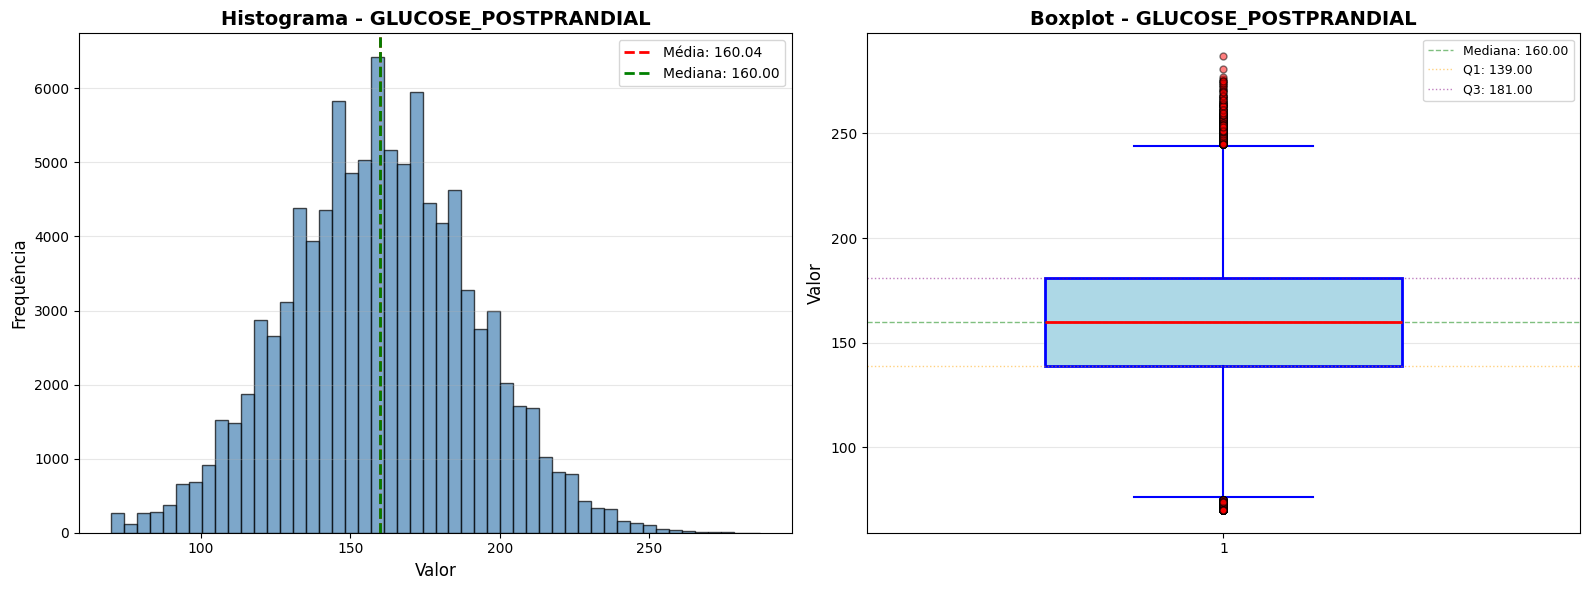


GLICOSE PÓS-PRANDIAL (mg/dL)

Referência: Normal: <140 (2h após refeição) | Diabetes: ≥200

ESTATÍSTICAS:
   - Média: 160.04
   - Mediana: 160.00
   - Desvio Padrão: 30.94
   - Assimetria: 0.028
   - Mínimo: 70.00
   - Máximo: 287.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 139.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 160.00 - divide os dados ao meio
   - Q3 (75%): 181.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 42.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 76.00
   - Limite superior: 244.00
   - Número de outliers: 634 (0.63% dos dados)
   - Outliers detectados: valores fora do intervalo [76.00, 244.00]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Simétrica
   Média: 160.0 mg/dL está MUITO ACIMA do normal.
   
ALERTA CRÍTICO: Maioria da população com glicose pós-prandial elevada, indicando
 

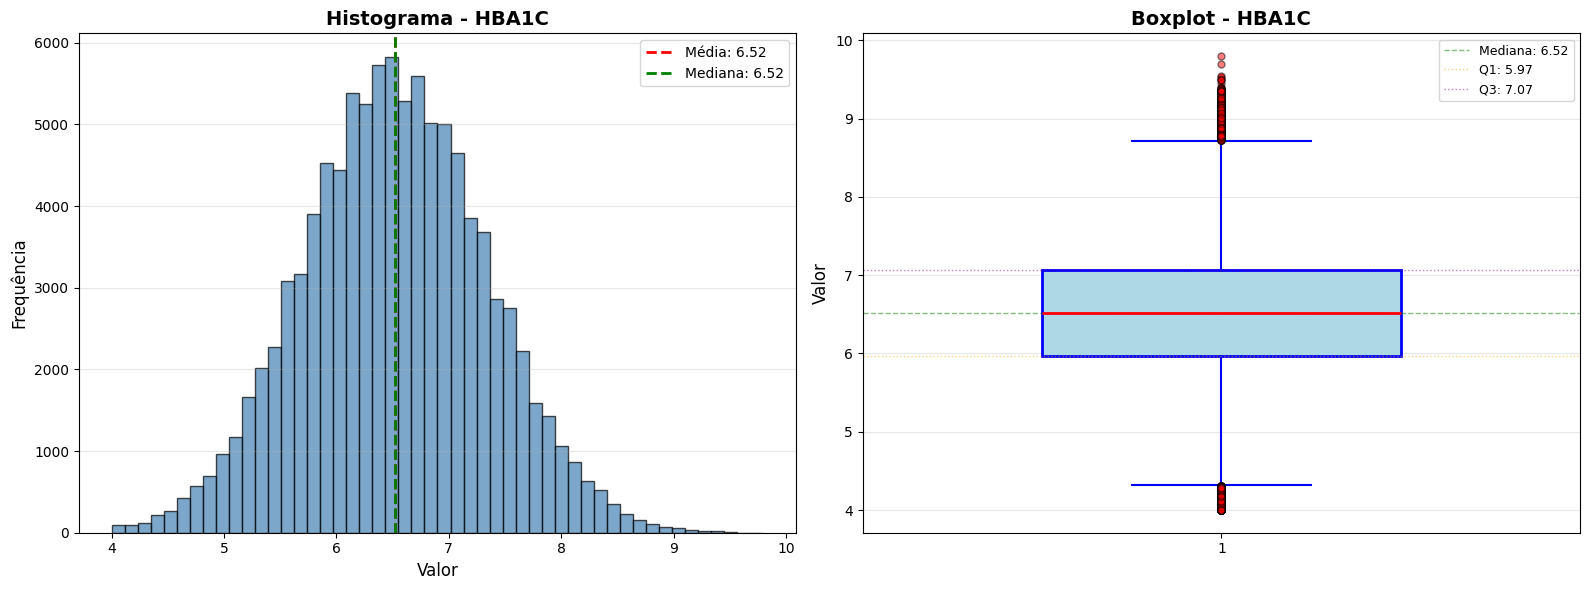


HEMOGLOBINA GLICADA - HbA1c (%)

Referência: Normal: <5.7 | Pré-diabetes: 5.7-6.4 | Diabetes: ≥6.5

ESTATÍSTICAS:
   - Média: 6.52
   - Mediana: 6.52
   - Desvio Padrão: 0.81
   - Assimetria: 0.032
   - Mínimo: 4.00
   - Máximo: 9.80

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 5.97 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 6.52 - divide os dados ao meio
   - Q3 (75%): 7.07 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 1.10 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 4.32
   - Limite superior: 8.72
   - Número de outliers: 618 (0.62% dos dados)
   - Outliers detectados: valores fora do intervalo [4.32, 8.72]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Simétrica
   Média: 6.52% está NO LIMIAR DIABÉTICO (≥6.5%).
   
ALERTA CRÍTICO: HbA1c indica controle glicêmico dos últimos 2-3 meses. População
   no limite d

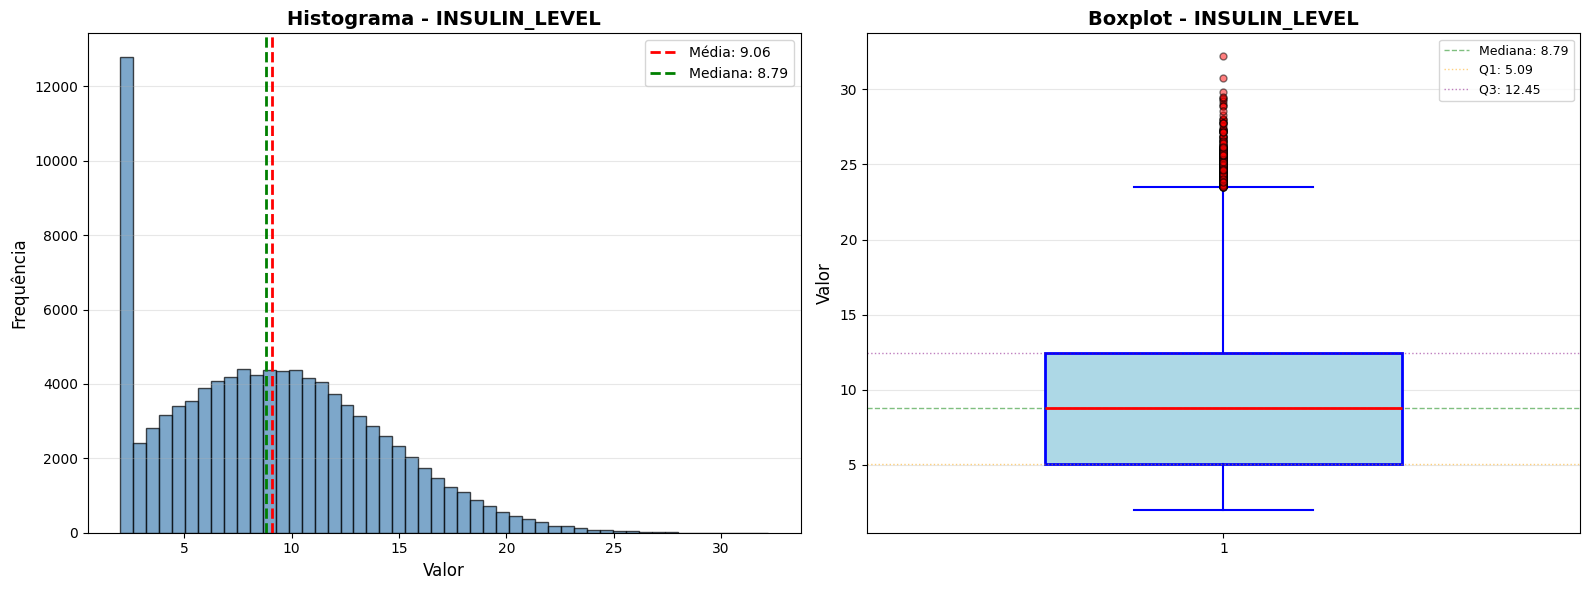


NÍVEL DE INSULINA (μU/mL)

Referência: Normal em jejum: 2-25 μU/mL

ESTATÍSTICAS:
   - Média: 9.06
   - Mediana: 8.79
   - Desvio Padrão: 4.95
   - Assimetria: 0.422
   - Mínimo: 2.00
   - Máximo: 32.22

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 5.09 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 8.79 - divide os dados ao meio
   - Q3 (75%): 12.45 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 7.36 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: -5.95
   - Limite superior: 23.49
   - Número de outliers: 326 (0.33% dos dados)
   - Outliers detectados: valores fora do intervalo [-5.95, 23.49]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Simétrica
   Assimetria: 0.422 indica presença de valores extremos.
   
INTERPRETAÇÃO: Alguns pacientes com níveis muito elevados de insulina (resistência
   insulínica severa). Distrib

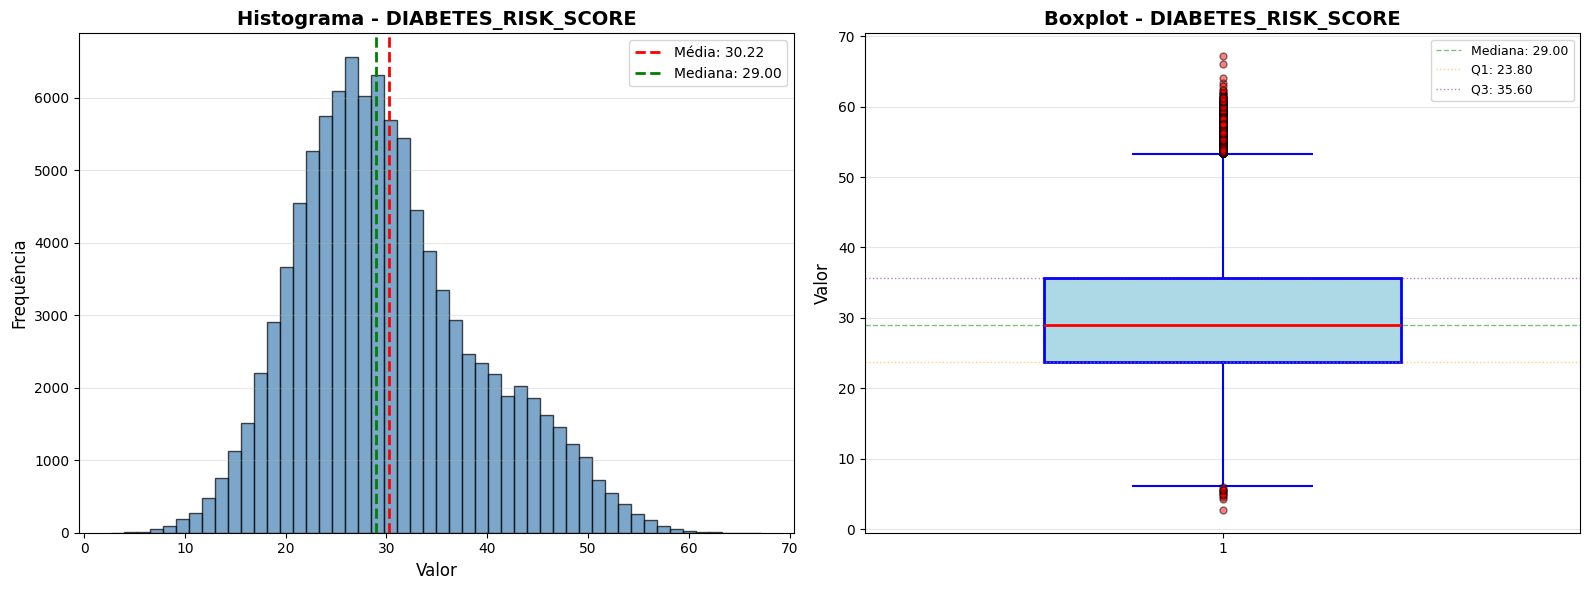


SCORE DE RISCO DE DIABETES

Score calculado com base em múltiplos fatores de risco

ESTATÍSTICAS:
   - Média: 30.22
   - Mediana: 29.00
   - Desvio Padrão: 9.06
   - Assimetria: 0.515
   - Mínimo: 2.70
   - Máximo: 67.20

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 23.80 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 29.00 - divide os dados ao meio
   - Q3 (75%): 35.60 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 11.80 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 6.10
   - Limite superior: 53.30
   - Número de outliers: 914 (0.91% dos dados)
   - Outliers detectados: valores fora do intervalo [6.10, 53.30]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Assimétrica à direita
   Média: 30.2 | Variação ampla: 2.7 a 67.2
   
INTERPRETAÇÃO: Maioria com risco moderado, mas existe um grupo significativo com
   risco muito 

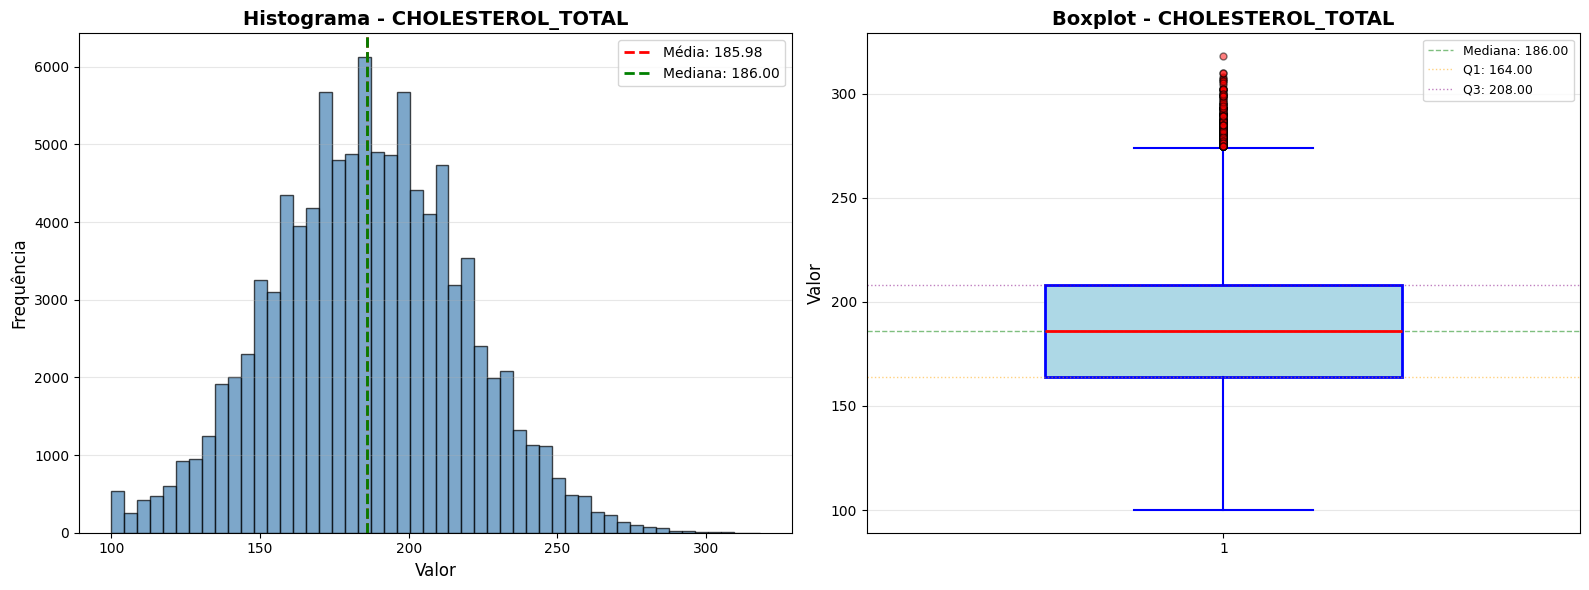


COLESTEROL TOTAL (mg/dL)

Referência: Desejável: <200 | Limítrofe: 200-239 | Alto: ≥240

ESTATÍSTICAS:
   - Média: 185.98
   - Mediana: 186.00
   - Desvio Padrão: 32.01
   - Assimetria: 0.034
   - Mínimo: 100.00
   - Máximo: 318.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 164.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 186.00 - divide os dados ao meio
   - Q3 (75%): 208.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 44.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 98.00
   - Limite superior: 274.00
   - Número de outliers: 309 (0.31% dos dados)
   - Outliers detectados: valores fora do intervalo [98.00, 274.00]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Simétrica
   Média: 186.0 mg/dL está no nível DESEJÁVEL (limítrofe).
   
INTERPRETAÇÃO: População relativamente saudável quanto ao colesterol total.

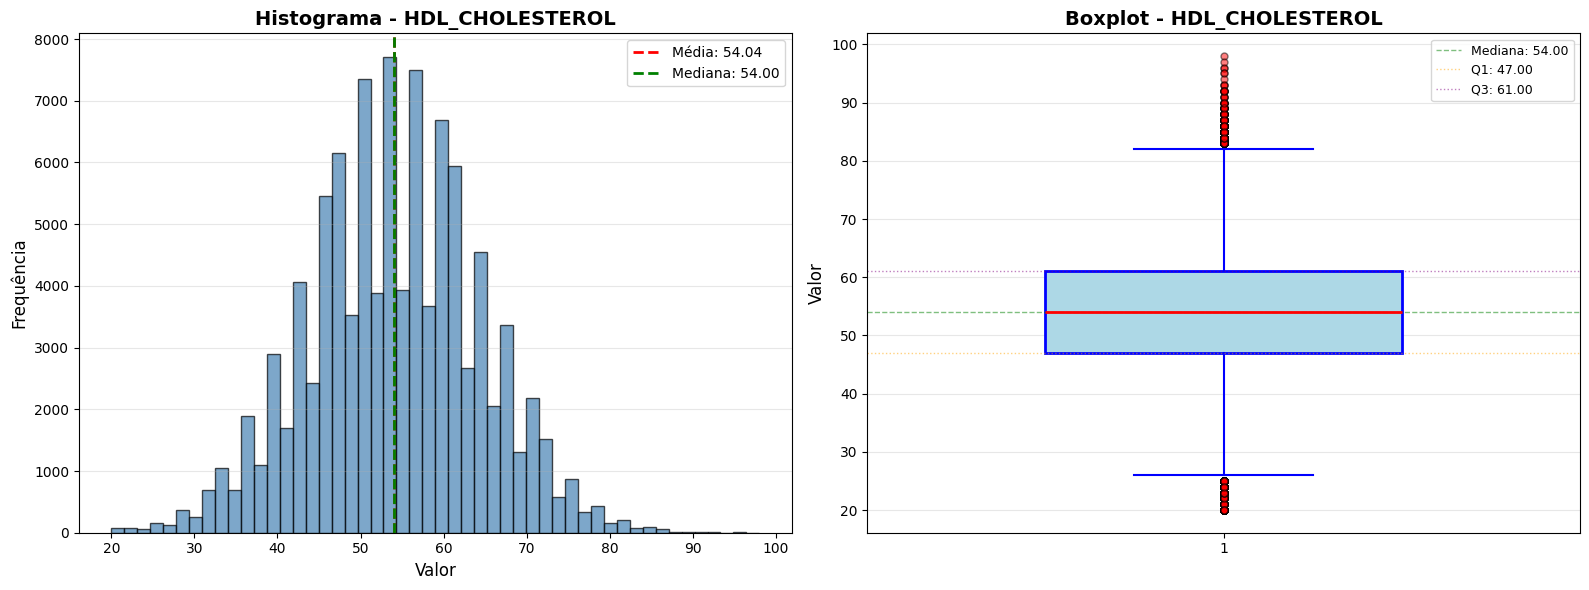


HDL - Colesterol "Bom" (mg/dL)

Referência: Baixo: <40 (homens), <50 (mulheres) | Ideal: ≥60

ESTATÍSTICAS:
   - Média: 54.04
   - Mediana: 54.00
   - Desvio Padrão: 10.27
   - Assimetria: -0.003
   - Mínimo: 20.00
   - Máximo: 98.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 47.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 54.00 - divide os dados ao meio
   - Q3 (75%): 61.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 14.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 26.00
   - Limite superior: 82.00
   - Número de outliers: 565 (0.56% dos dados)
   - Outliers detectados: valores fora do intervalo [26.00, 82.00]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Perfeitamente simétrica
   Média: 54.0 mg/dL está em nível ADEQUADO.
   
INTERPRETAÇÃO: HDL dentro da faixa protetora. Níveis adequados de colesterol b

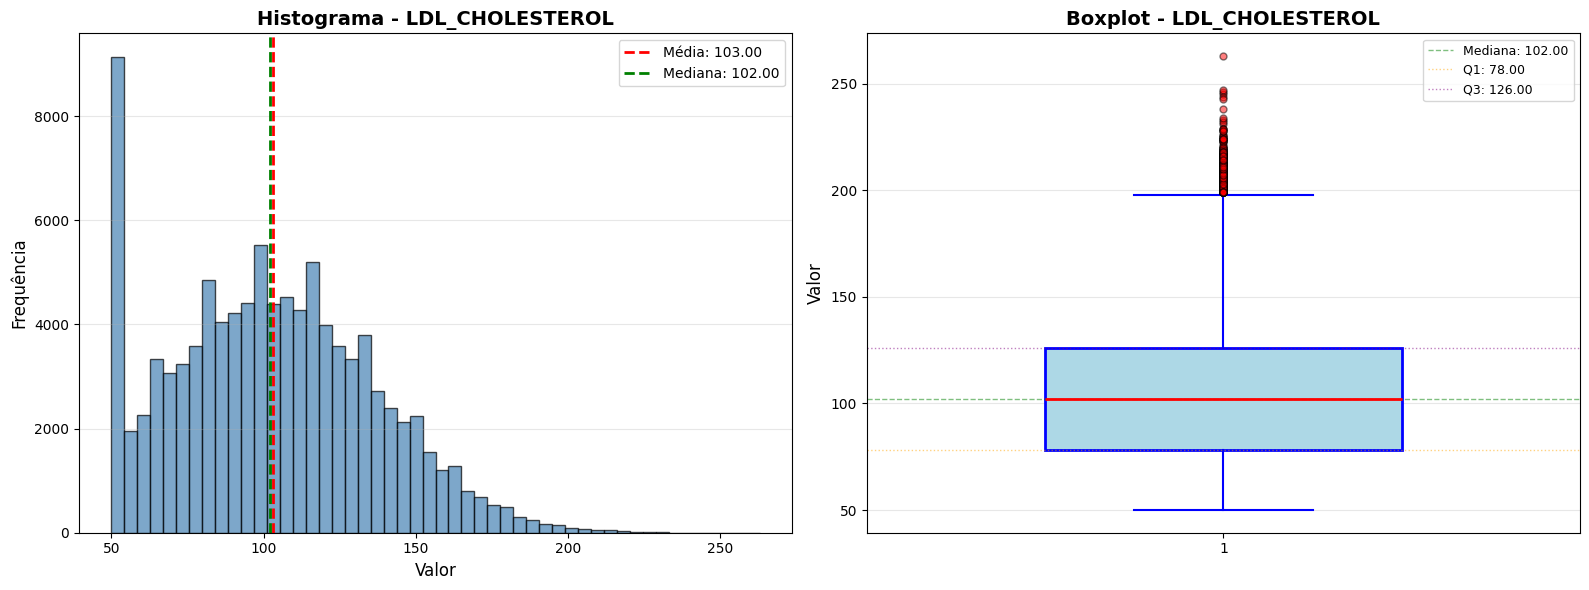


LDL - Colesterol "Ruim" (mg/dL)

Referência: Ótimo: <100 | Desejável: 100-129 | Limítrofe: 130-159

ESTATÍSTICAS:
   - Média: 103.00
   - Mediana: 102.00
   - Desvio Padrão: 33.39
   - Assimetria: 0.320
   - Mínimo: 50.00
   - Máximo: 263.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 78.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 102.00 - divide os dados ao meio
   - Q3 (75%): 126.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 48.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 6.00
   - Limite superior: 198.00
   - Número de outliers: 349 (0.35% dos dados)
   - Outliers detectados: valores fora do intervalo [6.00, 198.00]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Assimétrica à direita
   Média: 103.0 mg/dL está no nível ÓTIMO/DESEJÁVEL.
   
INTERPRETAÇÃO: LDL controlado na maioria da população. Alguns 

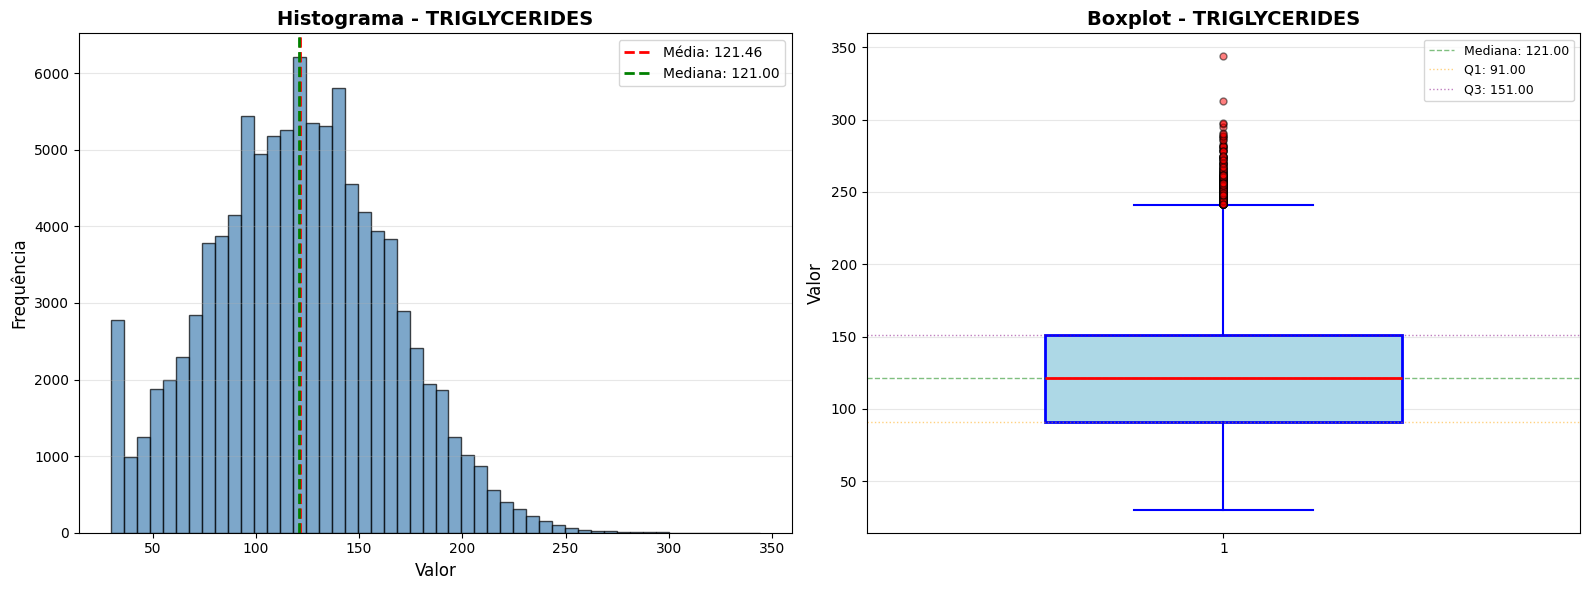


TRIGLICERÍDEOS (mg/dL)

Referência: Normal: <150 | Limítrofe: 150-199 | Alto: 200-499

ESTATÍSTICAS:
   - Média: 121.46
   - Mediana: 121.00
   - Desvio Padrão: 43.37
   - Assimetria: 0.104
   - Mínimo: 30.00
   - Máximo: 344.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 91.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 121.00 - divide os dados ao meio
   - Q3 (75%): 151.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 60.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 1.00
   - Limite superior: 241.00
   - Número de outliers: 301 (0.30% dos dados)
   - Outliers detectados: valores fora do intervalo [1.00, 241.00]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Simétrica
   Média: 121.5 mg/dL está DENTRO DA FAIXA NORMAL.
   
INTERPRETAÇÃO: Triglicerídeos controlados. Importante marcador metabólico,
   quando elev

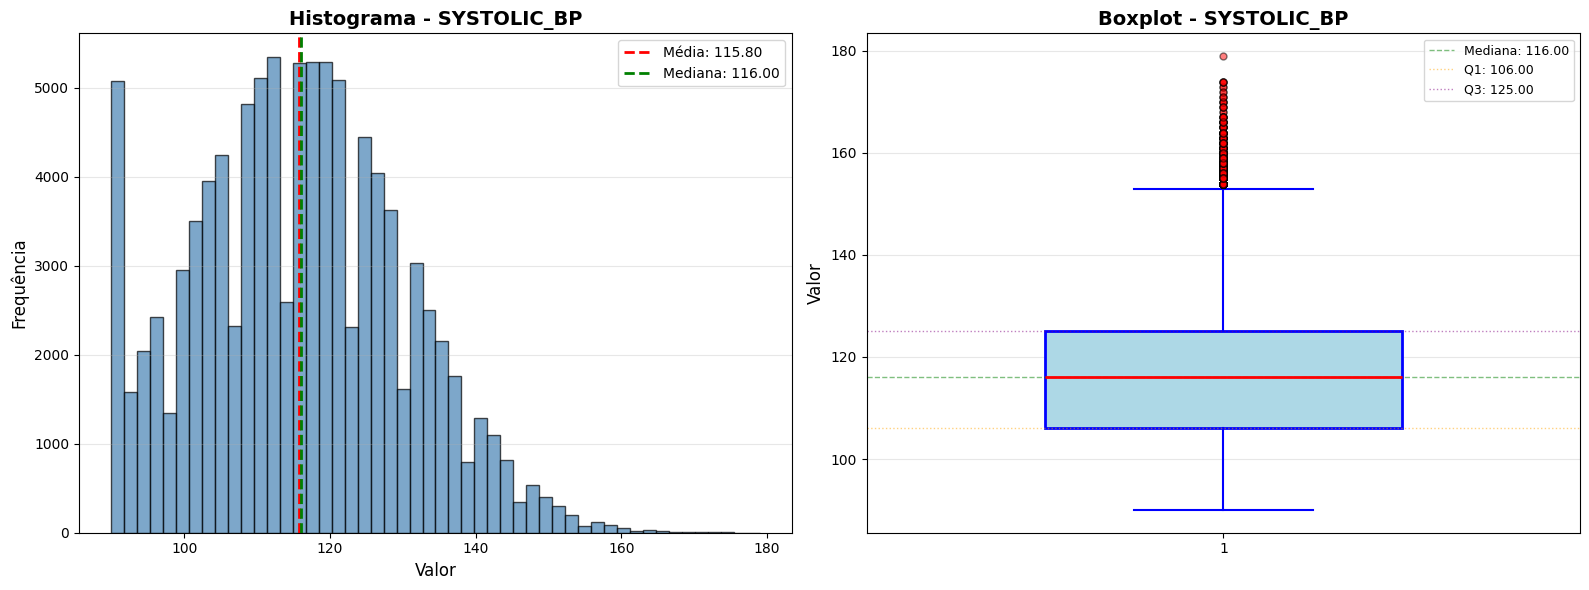


PRESSÃO SISTÓLICA (mmHg)

Referência: Normal: <120 | Pré-hipertensão: 120-139 | Hipertensão: ≥140

ESTATÍSTICAS:
   - Média: 115.80
   - Mediana: 116.00
   - Desvio Padrão: 14.28
   - Assimetria: 0.219
   - Mínimo: 90.00
   - Máximo: 179.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 106.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 116.00 - divide os dados ao meio
   - Q3 (75%): 125.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 19.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 77.50
   - Limite superior: 153.50
   - Número de outliers: 530 (0.53% dos dados)
   - Outliers detectados: valores fora do intervalo [77.50, 153.50]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Levemente assimétrica à direita
   Média: 115.8 mmHg está em FAIXA NORMAL/PRÉ-HIPERTENSÃO.
   
INTERPRETAÇÃO: Maioria no limiar da pré-hipe

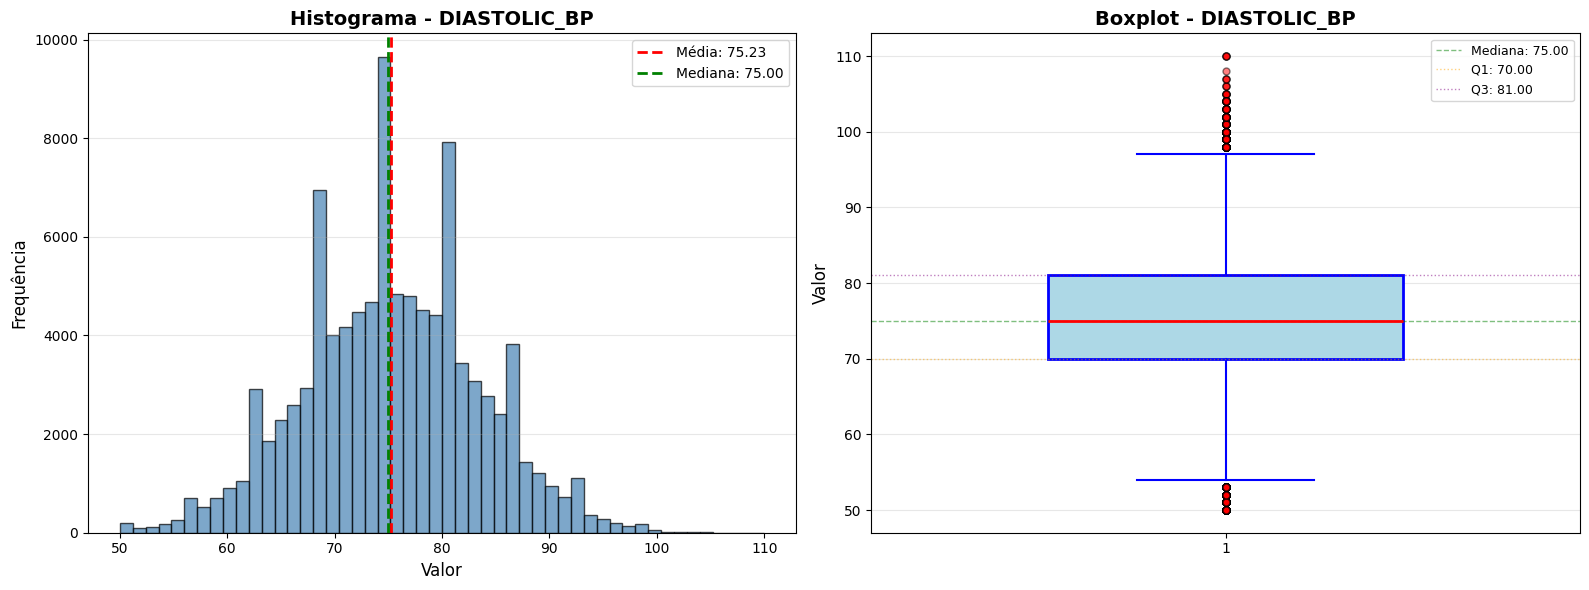


PRESSÃO DIASTÓLICA (mmHg)

Referência: Normal: <80 | Pré-hipertensão: 80-89 | Hipertensão: ≥90

ESTATÍSTICAS:
   - Média: 75.23
   - Mediana: 75.00
   - Desvio Padrão: 8.20
   - Assimetria: 0.007
   - Mínimo: 50.00
   - Máximo: 110.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 70.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 75.00 - divide os dados ao meio
   - Q3 (75%): 81.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 11.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 53.50
   - Limite superior: 97.50
   - Número de outliers: 731 (0.73% dos dados)
   - Outliers detectados: valores fora do intervalo [53.50, 97.50]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Perfeitamente simétrica
   Média: 75.2 mmHg está em FAIXA NORMAL.
   
INTERPRETAÇÃO: Pressão diastólica controlada na população. Melhor controle que
 

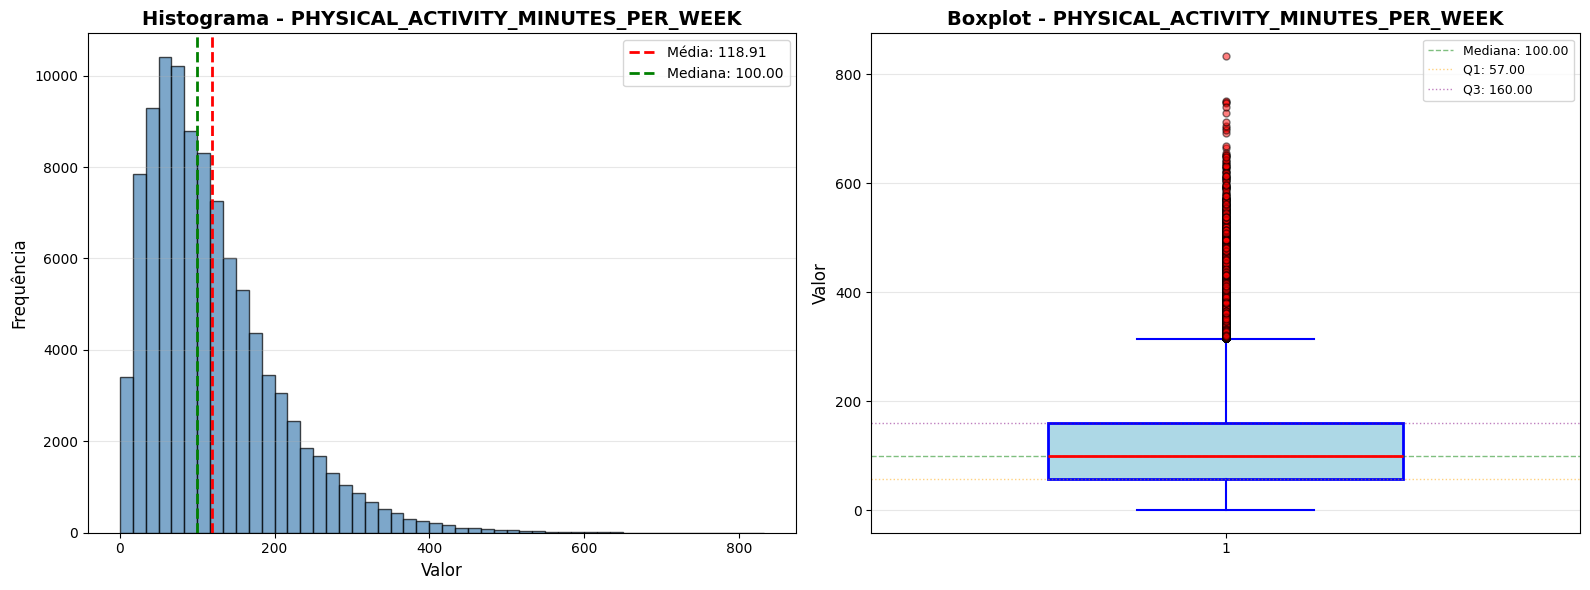


ATIVIDADE FÍSICA (minutos/semana)

Referência OMS: Recomendado: 150-300 min/semana de atividade moderada

ESTATÍSTICAS:
   - Média: 118.91
   - Mediana: 100.00
   - Desvio Padrão: 84.41
   - Assimetria: 1.390
   - Mínimo: 0.00
   - Máximo: 833.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 57.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 100.00 - divide os dados ao meio
   - Q3 (75%): 160.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 103.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: -97.50
   - Limite superior: 314.50
   - Número de outliers: 3199 (3.20% dos dados)
   - Outliers detectados: valores fora do intervalo [-97.50, 314.50]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: FORTEMENTE ASSIMÉTRICA À DIREITA (cauda longa)
   Assimetria: 1.390 - Distribuição típica de comportamento sedentário.
   
ALERTA:

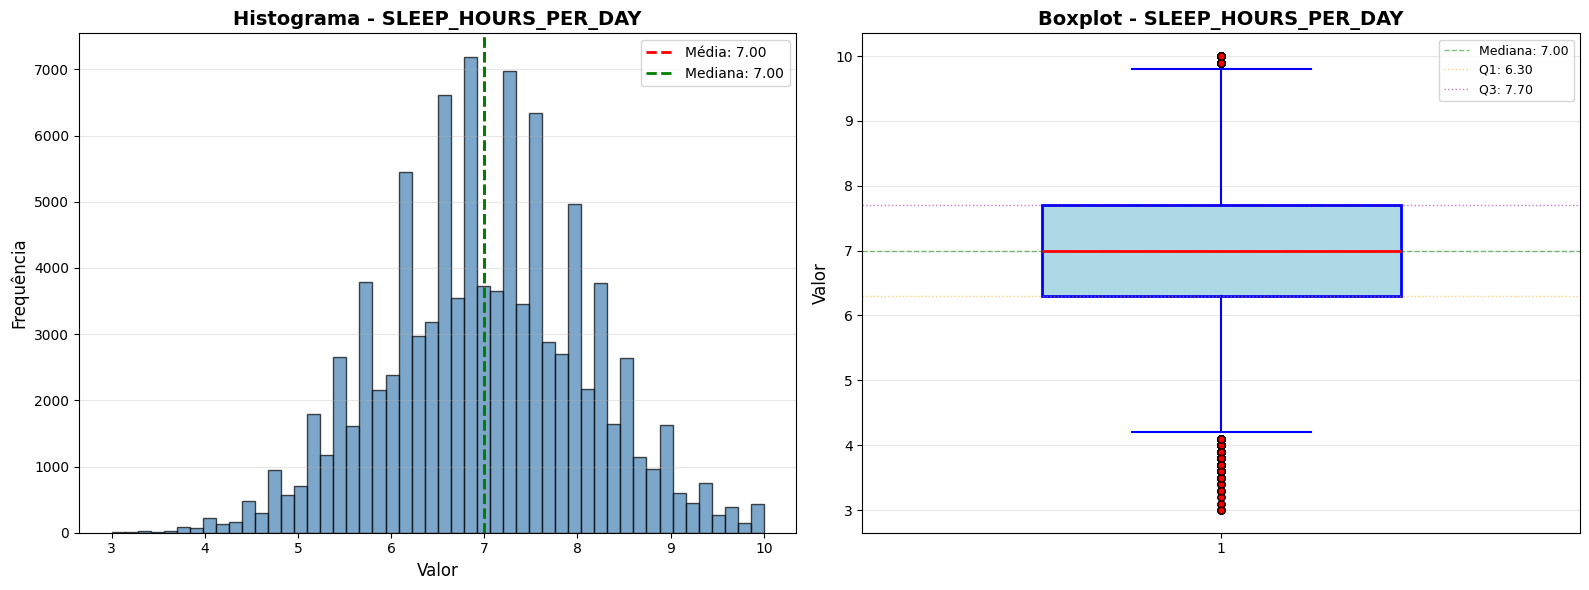


HORAS DE SONO POR DIA

Referência: Recomendado para adultos: 7-9 horas/dia

ESTATÍSTICAS:
   - Média: 7.00
   - Mediana: 7.00
   - Desvio Padrão: 1.09
   - Assimetria: -0.013
   - Mínimo: 3.00
   - Máximo: 10.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 6.30 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 7.00 - divide os dados ao meio
   - Q3 (75%): 7.70 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 1.40 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 4.20
   - Limite superior: 9.80
   - Número de outliers: 900 (0.90% dos dados)
   - Outliers detectados: valores fora do intervalo [4.20, 9.80]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Perfeitamente simétrica
   Média: 7.0h está na FAIXA IDEAL (7-9h).
   
INTERPRETAÇÃO: População com sono adequado. Sono insuficiente está associado a
   maior risco de diabetes e ob

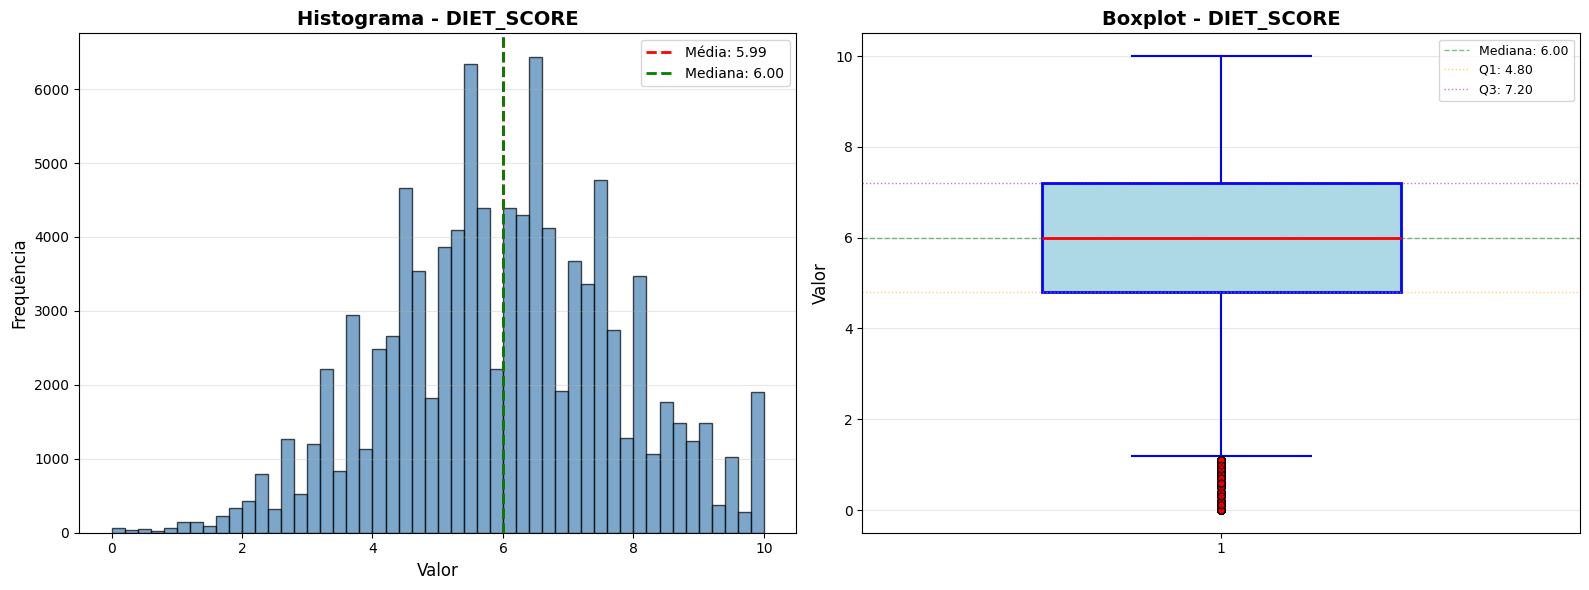


SCORE DE DIETA (0-10)

Score de qualidade alimentar: 0 (péssimo) a 10 (excelente)

ESTATÍSTICAS:
   - Média: 5.99
   - Mediana: 6.00
   - Desvio Padrão: 1.78
   - Assimetria: -0.070
   - Mínimo: 0.00
   - Máximo: 10.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 4.80 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 6.00 - divide os dados ao meio
   - Q3 (75%): 7.20 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 2.40 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 1.20
   - Limite superior: 10.80
   - Número de outliers: 337 (0.34% dos dados)
   - Outliers detectados: valores fora do intervalo [1.20, 10.80]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Simétrica
   Média: 6.0/10 indica dieta MEDIANA.
   
INTERPRETAÇÃO: Qualidade alimentar moderada. Nem ótima nem péssima. Há espaço
   para melhorias na alimentação como est

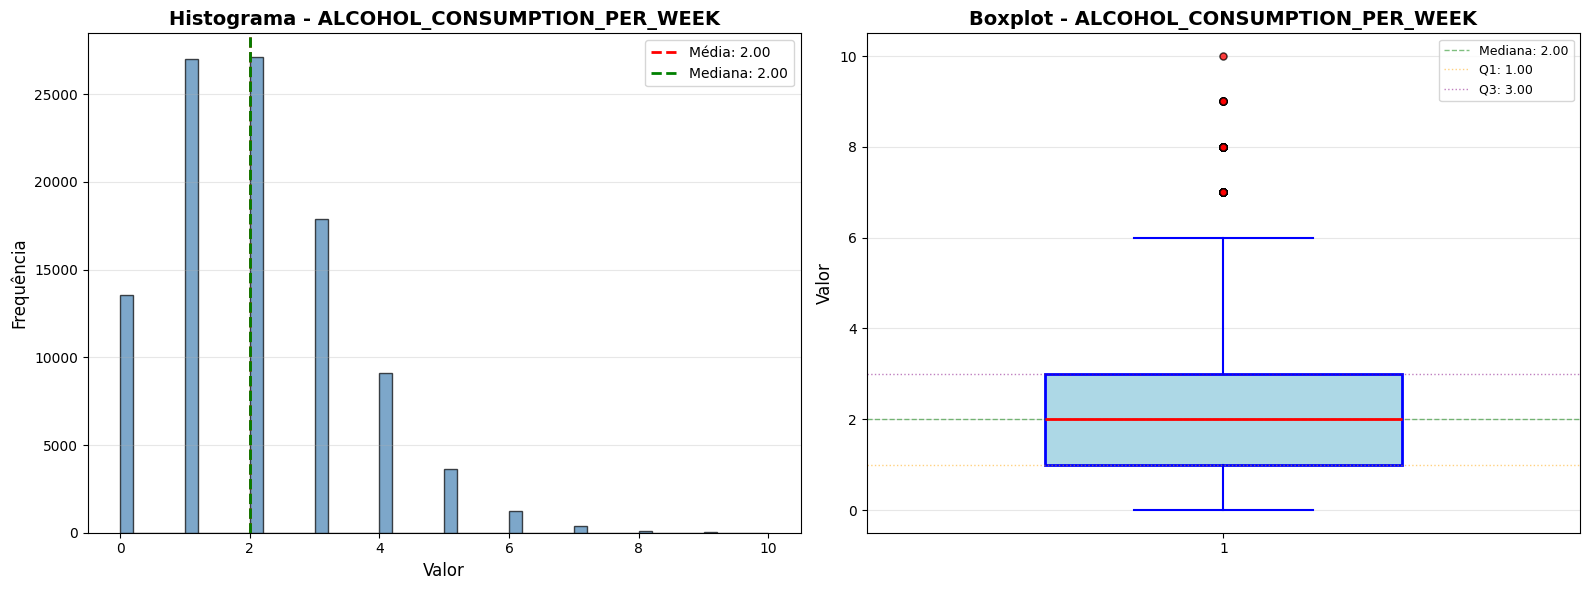


CONSUMO DE ÁLCOOL (doses/semana)

Referência: Moderado: ≤7 doses/semana (mulheres), ≤14 (homens)

ESTATÍSTICAS:
   - Média: 2.00
   - Mediana: 2.00
   - Desvio Padrão: 1.42
   - Assimetria: 0.703
   - Mínimo: 0.00
   - Máximo: 10.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 1.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 2.00 - divide os dados ao meio
   - Q3 (75%): 3.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 2.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: -2.00
   - Limite superior: 6.00
   - Número de outliers: 458 (0.46% dos dados)
   - Outliers detectados: valores fora do intervalo [-2.00, 6.00]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Assimétrica à direita (cauda longa)
   Assimetria: 0.703 - Maioria consome pouco.
   
INTERPRETAÇÃO: Média 2.0 doses/semana indica consumo baixo/moderado.
   

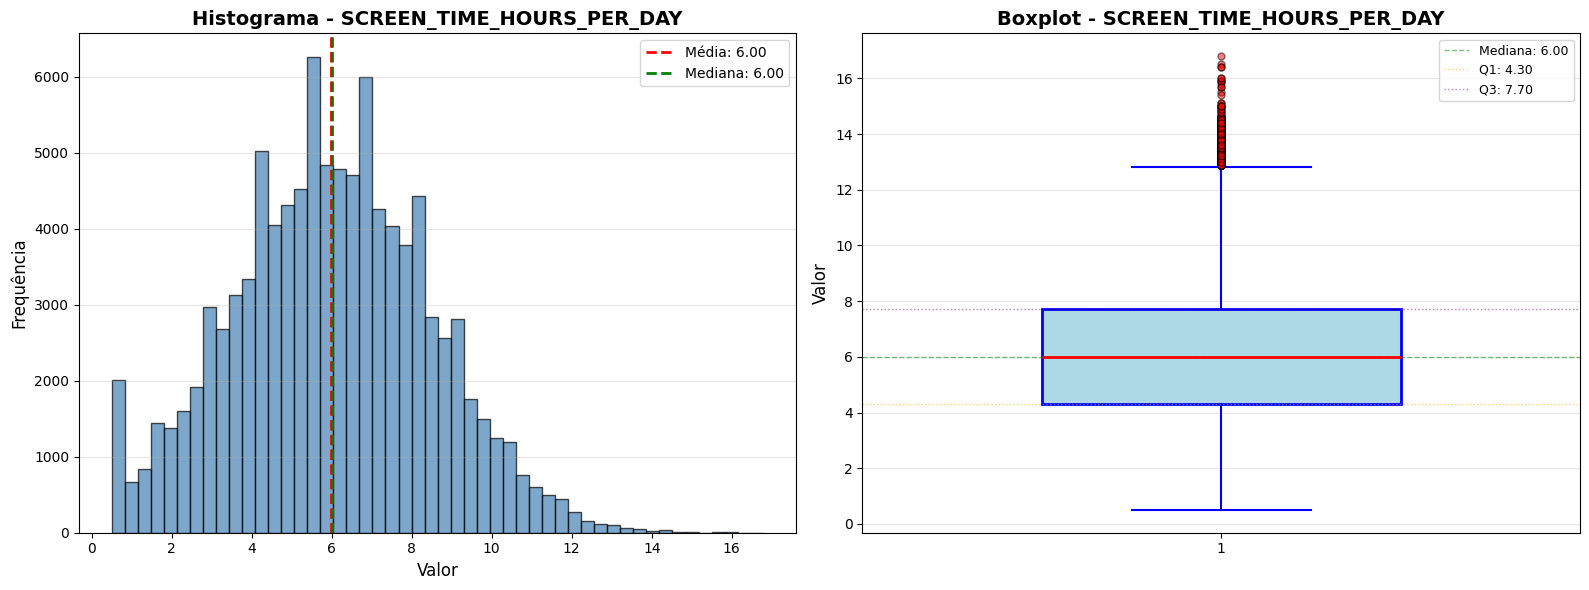


TEMPO DE TELA (horas/dia)

Referência: Alto: >4h/dia está associado a sedentarismo

ESTATÍSTICAS:
   - Média: 6.00
   - Mediana: 6.00
   - Desvio Padrão: 2.47
   - Assimetria: 0.083
   - Mínimo: 0.50
   - Máximo: 16.80

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 4.30 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 6.00 - divide os dados ao meio
   - Q3 (75%): 7.70 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 3.40 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: -0.80
   - Limite superior: 12.80
   - Número de outliers: 305 (0.30% dos dados)
   - Outliers detectados: valores fora do intervalo [-0.80, 12.80]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Simétrica
   Média: 6.0h/dia é considerado ELEVADO.
   
ALERTA: Tempo de tela excessivo está associado a sedentarismo, obesidade e maior
   risco metabólico. Fator de ris

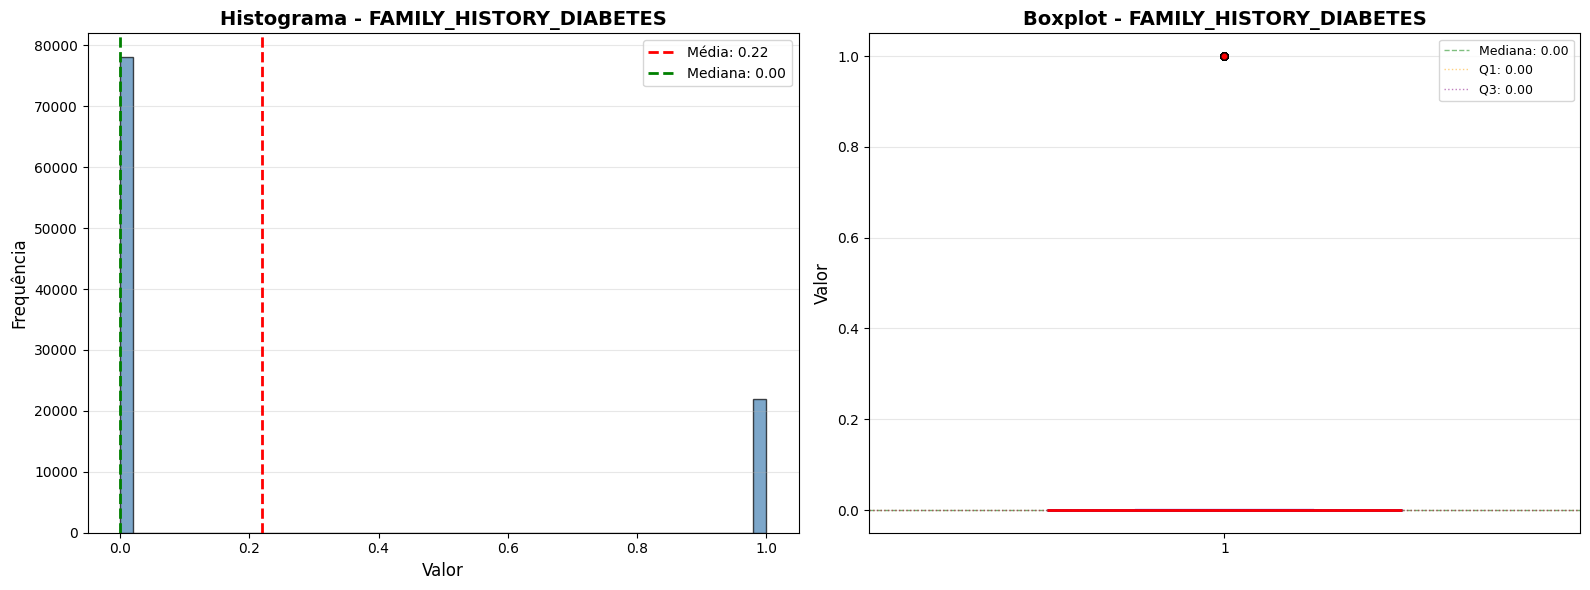


HISTÓRICO FAMILIAR DE DIABETES (0=Não, 1=Sim)

Variável binária indicando predisposição genética

ESTATÍSTICAS:
   - Média: 0.22
   - Mediana: 0.00
   - Desvio Padrão: 0.41
   - Assimetria: 1.356
   - Mínimo: 0.00
   - Máximo: 1.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 0.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 0.00 - divide os dados ao meio
   - Q3 (75%): 0.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 0.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 0.00
   - Limite superior: 0.00
   - Número de outliers: 21941 (21.94% dos dados)
   - Outliers detectados: valores fora do intervalo [0.00, 0.00]
   - ATENÇÃO: Alto percentual de outliers pode indicar:
      * Variabilidade natural da população
      * Presença de subgrupos distintos
      * Erros de medição (menos provável)

DISTRIBUIÇÃO: Fortemente assimétric

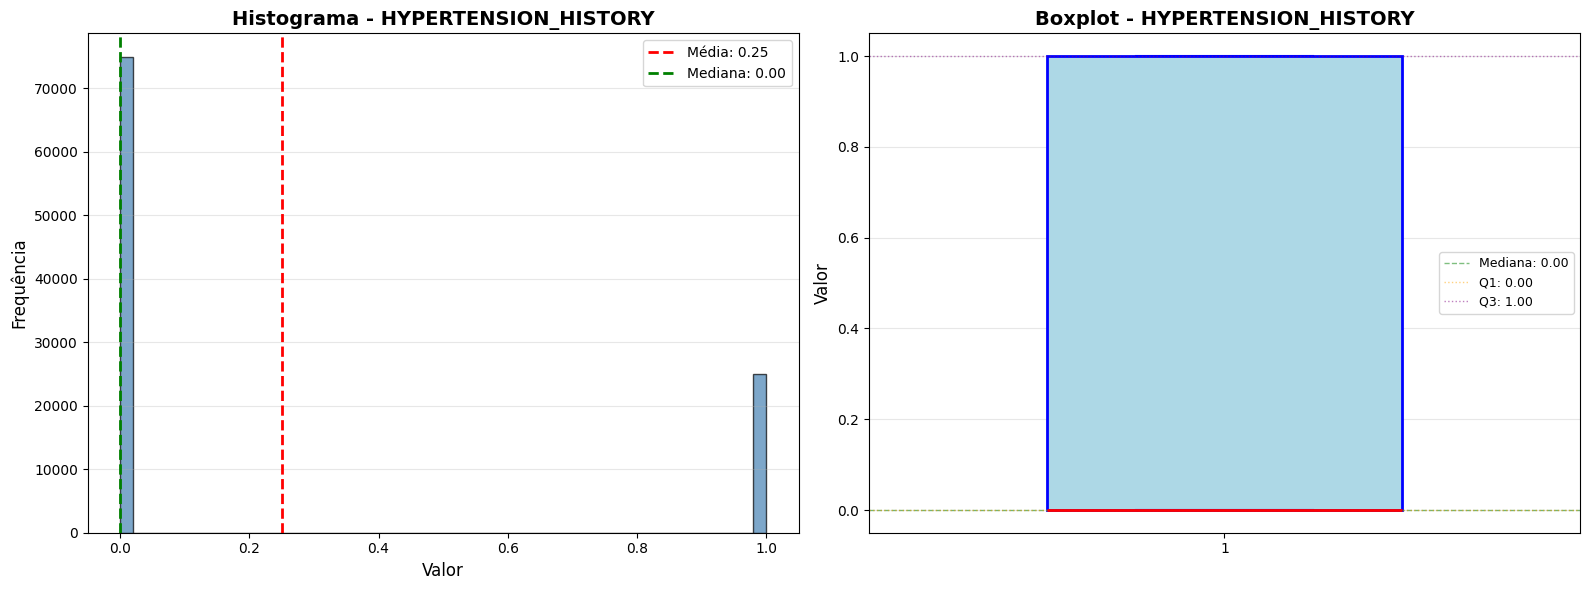


HISTÓRICO DE HIPERTENSÃO (0=Não, 1=Sim)

Variável binária indicando comorbidade

ESTATÍSTICAS:
   - Média: 0.25
   - Mediana: 0.00
   - Desvio Padrão: 0.43
   - Assimetria: 1.150
   - Mínimo: 0.00
   - Máximo: 1.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 0.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 0.00 - divide os dados ao meio
   - Q3 (75%): 1.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 1.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: -1.50
   - Limite superior: 2.50
   - Número de outliers: 0 (0.00% dos dados)
   - Nenhum outlier detectado - distribuição bem comportada

DISTRIBUIÇÃO: Fortemente assimétrica (variável binária)
   25.1% da população TEM histórico de hipertensão.
   
COMORBIDADE IMPORTANTE: Hipertensão e diabetes frequentemente coexistem (síndrome
   metabólica). Aumenta significativamente o ris

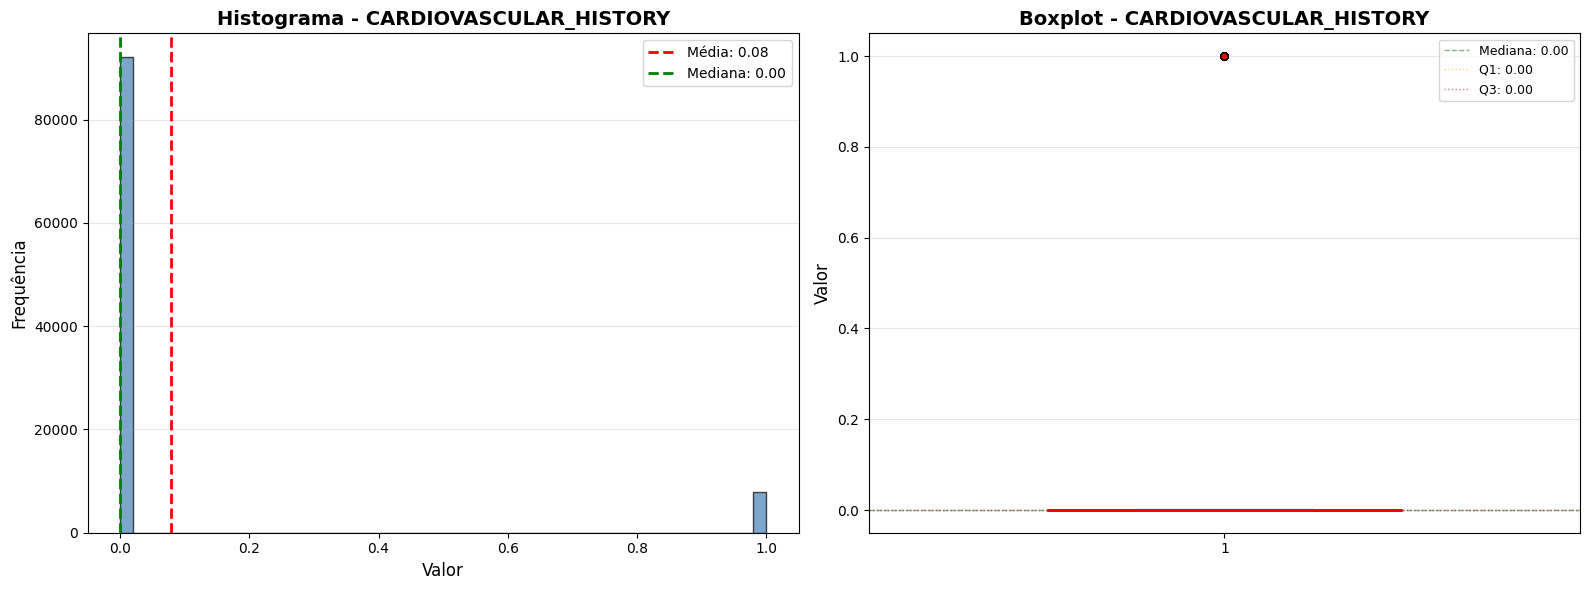


HISTÓRICO CARDIOVASCULAR (0=Não, 1=Sim)

Variável binária - evento raro mas grave

ESTATÍSTICAS:
   - Média: 0.08
   - Mediana: 0.00
   - Desvio Padrão: 0.27
   - Assimetria: 3.116
   - Mínimo: 0.00
   - Máximo: 1.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 0.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 0.00 - divide os dados ao meio
   - Q3 (75%): 0.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 0.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 0.00
   - Limite superior: 0.00
   - Número de outliers: 7920 (7.92% dos dados)
   - Outliers detectados: valores fora do intervalo [0.00, 0.00]
   - ATENÇÃO: Alto percentual de outliers pode indicar:
      * Variabilidade natural da população
      * Presença de subgrupos distintos
      * Erros de medição (menos provável)

DISTRIBUIÇÃO: MUITO ASSIMÉTRICA (evento raro)
   Ape

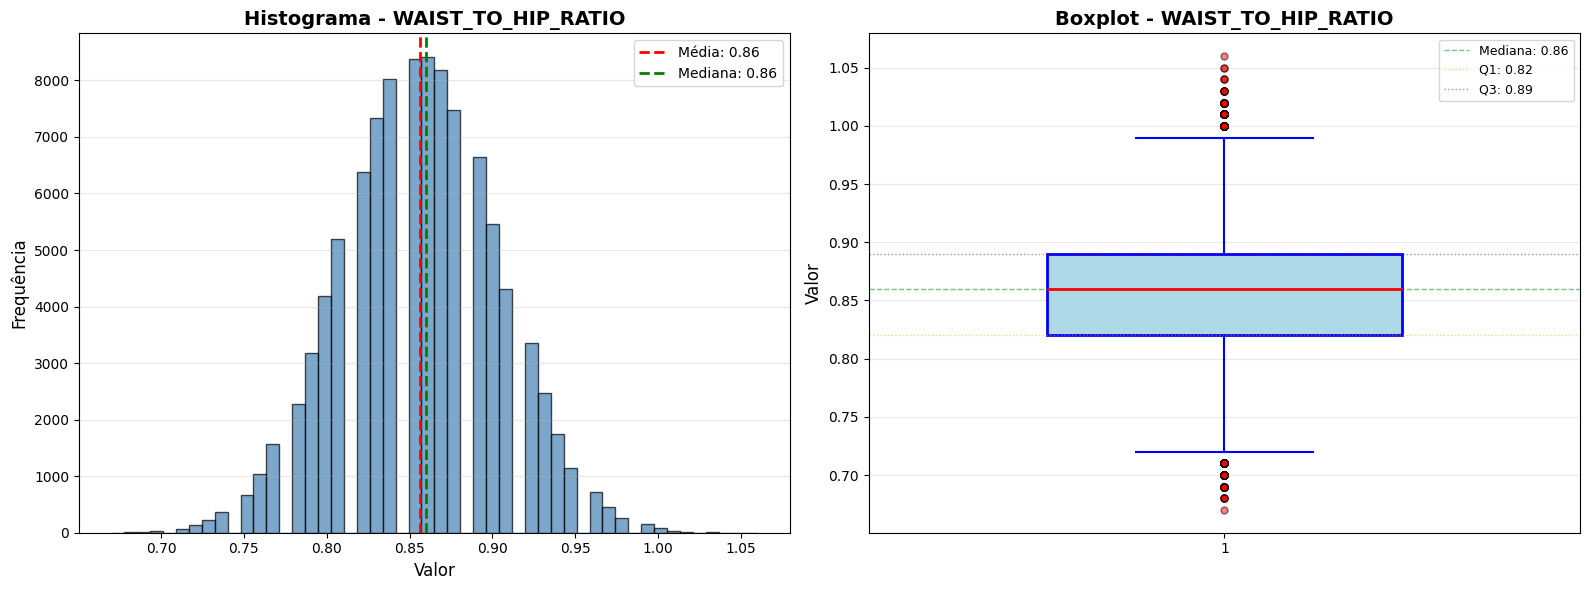


RELAÇÃO CINTURA/QUADRIL

Referência: Risco aumentado: >0.90 (homens), >0.85 (mulheres)

ESTATÍSTICAS:
   - Média: 0.86
   - Mediana: 0.86
   - Desvio Padrão: 0.05
   - Assimetria: 0.006
   - Mínimo: 0.67
   - Máximo: 1.06

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 0.82 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 0.86 - divide os dados ao meio
   - Q3 (75%): 0.89 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 0.07 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 0.71
   - Limite superior: 1.00
   - Número de outliers: 273 (0.27% dos dados)
   - Outliers detectados: valores fora do intervalo [0.71, 1.00]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Perfeitamente simétrica
   Média: 0.856 está NO LIMIAR DE RISCO.
   
OBESIDADE CENTRAL: Distribuição de gordura abdominal é melhor preditor de
   diabetes que IMC. Populaç

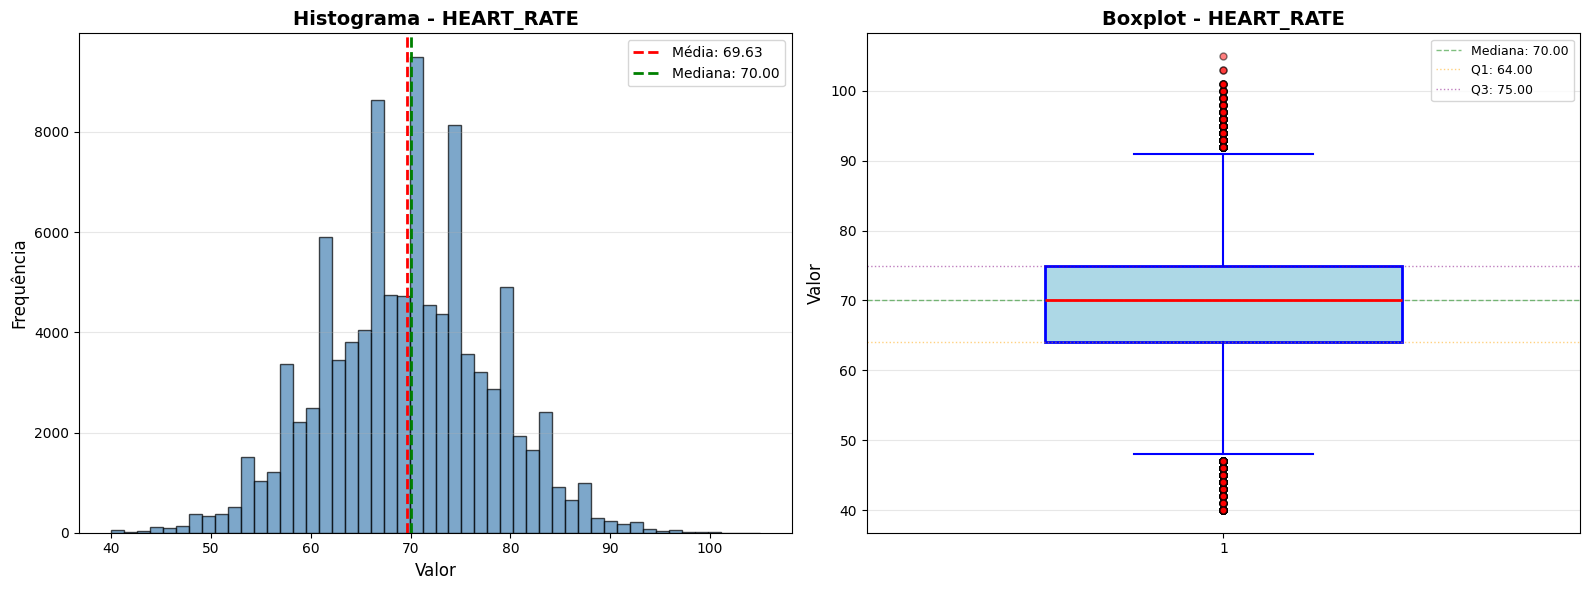


FREQUÊNCIA CARDÍACA (bpm)

Referência em repouso: Normal: 60-100 bpm | Atletas: 40-60

ESTATÍSTICAS:
   - Média: 69.63
   - Mediana: 70.00
   - Desvio Padrão: 8.37
   - Assimetria: -0.017
   - Mínimo: 40.00
   - Máximo: 105.00

ANÁLISE DE QUARTIS E BOXPLOT:
   - Q1 (25%): 64.00 - 25% dos valores estão abaixo deste ponto
   - Q2 (50% - Mediana): 70.00 - divide os dados ao meio
   - Q3 (75%): 75.00 - 75% dos valores estão abaixo deste ponto
   - IQR (Intervalo Interquartil): 11.00 - amplitude do 'meio' dos dados
   - Amplitude entre Q1 e Q3: 50% dos dados concentrados nesta faixa

OUTLIERS (Regra 1.5*IQR):
   - Limite inferior: 47.50
   - Limite superior: 91.50
   - Número de outliers: 855 (0.85% dos dados)
   - Outliers detectados: valores fora do intervalo [47.50, 91.50]
   - Percentual aceitável de outliers (<5%)

DISTRIBUIÇÃO: Perfeitamente simétrica
   Média: 69.6 bpm está em FAIXA NORMAL (60-100 bpm).
   
INTERPRETAÇÃO: Frequência cardíaca adequada. FC muito elevada em repouso pod

In [8]:
# Histogramas + Boxplots de TODAS as variáveis numéricas com ANÁLISE DETALHADA

# Selecionar TODAS as colunas numéricas relevantes (23 variáveis)
numerical_cols = [
    'age', 'bmi', 'glucose_fasting', 'glucose_postprandial',
    'hba1c', 'insulin_level', 'diabetes_risk_score',
    'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
    'triglycerides', 'systolic_bp', 'diastolic_bp',
    'physical_activity_minutes_per_week', 'sleep_hours_per_day',
    'diet_score', 'alcohol_consumption_per_week', 'screen_time_hours_per_day',
    'family_history_diabetes', 'hypertension_history', 'cardiovascular_history',
    'waist_to_hip_ratio', 'heart_rate'
]

# Dicionário com análises detalhadas para cada variável
analyses = {
    'age': {
        'desc': 'IDADE (anos)',
        'ref': 'Distribuição da idade dos pacientes no estudo',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Simétrica' if abs(skew) < 0.5 else 'Assimétrica à direita' if skew > 0 else 'Assimétrica à esquerda'}
   Média ≈ Mediana indica distribuição equilibrada entre todas as faixas etárias.
   
INTERPRETAÇÃO: População adulta bem distribuída (18-90 anos). O risco de diabetes 
   aumenta com a idade, sendo este um importante preditor para o modelo."""
    },
    'bmi': {
        'desc': 'IMC - Índice de Massa Corporal (kg/m²)',
        'ref': 'Referência: Normal: 18.5-24.9 | Sobrepeso: 25-29.9 | Obesidade: ≥30',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Perfeitamente simétrica' if abs(skew) < 0.1 else 'Simétrica' if abs(skew) < 0.5 else 'Assimétrica'}
   Média: {mean:.1f} está no limiar entre normal e sobrepeso.
   
ALERTA: População com IMC elevado - fator de risco importante para diabetes tipo 2.
   50% dos pacientes têm IMC entre 23.2-28.0 (risco moderado a alto)."""
    },
    'glucose_fasting': {
        'desc': 'GLICOSE EM JEJUM (mg/dL)',
        'ref': 'Referência: Normal: <100 | Pré-diabetes: 100-125 | Diabetes: ≥126',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Simétrica' if abs(skew) < 0.5 else 'Assimétrica'}
   Média: {mean:.1f} mg/dL está na ZONA PRÉ-DIABÉTICA.
   
ALERTA CRÍTICO: Metade da população está acima de 111 mg/dL, indicando controle 
   glicêmico comprometido. Este é um dos principais marcadores de diabetes."""
    },
    'glucose_postprandial': {
        'desc': 'GLICOSE PÓS-PRANDIAL (mg/dL)',
        'ref': 'Referência: Normal: <140 (2h após refeição) | Diabetes: ≥200',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Simétrica' if abs(skew) < 0.5 else 'Assimétrica'}
   Média: {mean:.1f} mg/dL está MUITO ACIMA do normal.
   
ALERTA CRÍTICO: Maioria da população com glicose pós-prandial elevada, indicando
   problemas no metabolismo da glicose. Forte preditor de diabetes."""
    },
    'hba1c': {
        'desc': 'HEMOGLOBINA GLICADA - HbA1c (%)',
        'ref': 'Referência: Normal: <5.7 | Pré-diabetes: 5.7-6.4 | Diabetes: ≥6.5',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Simétrica' if abs(skew) < 0.5 else 'Assimétrica'}
   Média: {mean:.2f}% está NO LIMIAR DIABÉTICO (≥6.5%).
   
ALERTA CRÍTICO: HbA1c indica controle glicêmico dos últimos 2-3 meses. População
   no limite do diagnóstico de diabetes. Marcador GOLD STANDARD para diagnóstico."""
    },
    'insulin_level': {
        'desc': 'NÍVEL DE INSULINA (μU/mL)',
        'ref': 'Referência: Normal em jejum: 2-25 μU/mL',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Assimétrica à direita (cauda longa)' if skew > 0.5 else 'Simétrica'}
   Assimetria: {skew:.3f} indica presença de valores extremos.
   
INTERPRETAÇÃO: Alguns pacientes com níveis muito elevados de insulina (resistência
   insulínica severa). Distribuição típica de população com síndrome metabólica."""
    },
    'diabetes_risk_score': {
        'desc': 'SCORE DE RISCO DE DIABETES',
        'ref': 'Score calculado com base em múltiplos fatores de risco',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Assimétrica à direita' if skew > 0.5 else 'Simétrica'}
   Média: {mean:.1f} | Variação ampla: 2.7 a 67.2
   
INTERPRETAÇÃO: Maioria com risco moderado, mas existe um grupo significativo com
   risco muito elevado. Esta variável agrega múltiplos fatores de risco."""
    },
    'cholesterol_total': {
        'desc': 'COLESTEROL TOTAL (mg/dL)',
        'ref': 'Referência: Desejável: <200 | Limítrofe: 200-239 | Alto: ≥240',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Simétrica' if abs(skew) < 0.5 else 'Assimétrica'}
   Média: {mean:.1f} mg/dL está no nível DESEJÁVEL (limítrofe).
   
INTERPRETAÇÃO: População relativamente saudável quanto ao colesterol total.
   Não é um fator de risco primário neste grupo."""
    },
    'hdl_cholesterol': {
        'desc': 'HDL - Colesterol "Bom" (mg/dL)',
        'ref': 'Referência: Baixo: <40 (homens), <50 (mulheres) | Ideal: ≥60',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Perfeitamente simétrica' if abs(skew) < 0.1 else 'Simétrica'}
   Média: {mean:.1f} mg/dL está em nível ADEQUADO.
   
INTERPRETAÇÃO: HDL dentro da faixa protetora. Níveis adequados de colesterol bom
   ajudam a proteger contra doenças cardiovasculares."""
    },
    'ldl_cholesterol': {
        'desc': 'LDL - Colesterol "Ruim" (mg/dL)',
        'ref': 'Referência: Ótimo: <100 | Desejável: 100-129 | Limítrofe: 130-159',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Assimétrica à direita' if skew > 0.3 else 'Simétrica'}
   Média: {mean:.1f} mg/dL está no nível ÓTIMO/DESEJÁVEL.
   
INTERPRETAÇÃO: LDL controlado na maioria da população. Alguns valores elevados
   na cauda direita indicam subgrupo com risco cardiovascular aumentado."""
    },
    'triglycerides': {
        'desc': 'TRIGLICERÍDEOS (mg/dL)',
        'ref': 'Referência: Normal: <150 | Limítrofe: 150-199 | Alto: 200-499',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Simétrica' if abs(skew) < 0.5 else 'Assimétrica'}
   Média: {mean:.1f} mg/dL está DENTRO DA FAIXA NORMAL.
   
INTERPRETAÇÃO: Triglicerídeos controlados. Importante marcador metabólico,
   quando elevado está associado a resistência insulínica."""
    },
    'systolic_bp': {
        'desc': 'PRESSÃO SISTÓLICA (mmHg)',
        'ref': 'Referência: Normal: <120 | Pré-hipertensão: 120-139 | Hipertensão: ≥140',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Levemente assimétrica à direita' if skew > 0.2 else 'Simétrica'}
   Média: {mean:.1f} mmHg está em FAIXA NORMAL/PRÉ-HIPERTENSÃO.
   
INTERPRETAÇÃO: Maioria no limiar da pré-hipertensão. Hipertensão é comorbidade
   frequente em diabéticos, aumentando risco cardiovascular."""
    },
    'diastolic_bp': {
        'desc': 'PRESSÃO DIASTÓLICA (mmHg)',
        'ref': 'Referência: Normal: <80 | Pré-hipertensão: 80-89 | Hipertensão: ≥90',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Perfeitamente simétrica' if abs(skew) < 0.1 else 'Simétrica'}
   Média: {mean:.1f} mmHg está em FAIXA NORMAL.
   
INTERPRETAÇÃO: Pressão diastólica controlada na população. Melhor controle que
   a sistólica, padrão comum em adultos."""
    },
    'physical_activity_minutes_per_week': {
        'desc': 'ATIVIDADE FÍSICA (minutos/semana)',
        'ref': 'Referência OMS: Recomendado: 150-300 min/semana de atividade moderada',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: FORTEMENTE ASSIMÉTRICA À DIREITA (cauda longa)
   Assimetria: {skew:.3f} - Distribuição típica de comportamento sedentário.
   
ALERTA: Média {mean:.1f} min/semana está ABAIXO da recomendação OMS (150 min).
   Maioria sedentária com poucos indivíduos muito ativos. FATOR DE RISCO importante!"""
    },
    'sleep_hours_per_day': {
        'desc': 'HORAS DE SONO POR DIA',
        'ref': 'Referência: Recomendado para adultos: 7-9 horas/dia',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Perfeitamente simétrica' if abs(skew) < 0.1 else 'Simétrica'}
   Média: {mean:.1f}h está na FAIXA IDEAL (7-9h).
   
INTERPRETAÇÃO: População com sono adequado. Sono insuficiente está associado a
   maior risco de diabetes e obesidade. Este não parece ser um problema neste grupo."""
    },
    'diet_score': {
        'desc': 'SCORE DE DIETA (0-10)',
        'ref': 'Score de qualidade alimentar: 0 (péssimo) a 10 (excelente)',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Simétrica' if abs(skew) < 0.5 else 'Assimétrica'}
   Média: {mean:.1f}/10 indica dieta MEDIANA.
   
INTERPRETAÇÃO: Qualidade alimentar moderada. Nem ótima nem péssima. Há espaço
   para melhorias na alimentação como estratégia de prevenção/controle do diabetes."""
    },
    'alcohol_consumption_per_week': {
        'desc': 'CONSUMO DE ÁLCOOL (doses/semana)',
        'ref': 'Referência: Moderado: ≤7 doses/semana (mulheres), ≤14 (homens)',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: Assimétrica à direita (cauda longa)
   Assimetria: {skew:.3f} - Maioria consome pouco.
   
INTERPRETAÇÃO: Média {mean:.1f} doses/semana indica consumo baixo/moderado.
   Distribuição típica: maioria abstêmia ou consumo leve, poucos bebem muito."""
    },
    'screen_time_hours_per_day': {
        'desc': 'TEMPO DE TELA (horas/dia)',
        'ref': 'Referência: Alto: >4h/dia está associado a sedentarismo',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Simétrica' if abs(skew) < 0.5 else 'Assimétrica'}
   Média: {mean:.1f}h/dia é considerado ELEVADO.
   
ALERTA: Tempo de tela excessivo está associado a sedentarismo, obesidade e maior
   risco metabólico. Fator de risco comportamental importante nesta população."""
    },
    'family_history_diabetes': {
        'desc': 'HISTÓRICO FAMILIAR DE DIABETES (0=Não, 1=Sim)',
        'ref': 'Variável binária indicando predisposição genética',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: Fortemente assimétrica (variável binária)
   {mean*100:.1f}% da população TEM histórico familiar de diabetes.
   
FATOR GENÉTICO: Histórico familiar aumenta risco em 2-6x. Este é um preditor
   NÃO MODIFICÁVEL importante para o modelo de machine learning."""
    },
    'hypertension_history': {
        'desc': 'HISTÓRICO DE HIPERTENSÃO (0=Não, 1=Sim)',
        'ref': 'Variável binária indicando comorbidade',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: Fortemente assimétrica (variável binária)
   {mean*100:.1f}% da população TEM histórico de hipertensão.
   
COMORBIDADE IMPORTANTE: Hipertensão e diabetes frequentemente coexistem (síndrome
   metabólica). Aumenta significativamente o risco cardiovascular."""
    },
    'cardiovascular_history': {
        'desc': 'HISTÓRICO CARDIOVASCULAR (0=Não, 1=Sim)',
        'ref': 'Variável binária - evento raro mas grave',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: MUITO ASSIMÉTRICA (evento raro)
   Apenas {mean*100:.1f}% têm histórico cardiovascular. Curtose muito alta.
   
EVENTO RARO MAS CRÍTICO: Apesar de raro, este é o preditor mais grave de
   complicações. Pacientes com histórico cardiovascular têm risco muito elevado."""
    },
    'waist_to_hip_ratio': {
        'desc': 'RELAÇÃO CINTURA/QUADRIL',
        'ref': 'Referência: Risco aumentado: >0.90 (homens), >0.85 (mulheres)',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Perfeitamente simétrica' if abs(skew) < 0.1 else 'Simétrica'}
   Média: {mean:.3f} está NO LIMIAR DE RISCO.
   
OBESIDADE CENTRAL: Distribuição de gordura abdominal é melhor preditor de
   diabetes que IMC. População com adiposidade visceral preocupante."""
    },
    'heart_rate': {
        'desc': 'FREQUÊNCIA CARDÍACA (bpm)',
        'ref': 'Referência em repouso: Normal: 60-100 bpm | Atletas: 40-60',
        'interpretation': lambda mean, median, skew: f"""
DISTRIBUIÇÃO: {'Perfeitamente simétrica' if abs(skew) < 0.1 else 'Simétrica'}
   Média: {mean:.1f} bpm está em FAIXA NORMAL (60-100 bpm).
   
INTERPRETAÇÃO: Frequência cardíaca adequada. FC muito elevada em repouso pode
   indicar descondicionamento ou problemas cardiovasculares, mas não é o caso aqui."""
    }
}

print(f"Total de variáveis analisadas: {len(numerical_cols)}\n")
print("=" * 100)

# Criar histogramas + boxplots individuais com análise detalhada
for col in numerical_cols:
    # Criar figura com 2 subplots (histograma e boxplot)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # HISTOGRAMA
    ax1.hist(df[col], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    ax1.set_title(f'Histograma - {col.upper()}', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Valor', fontsize=12)
    ax1.set_ylabel('Frequência', fontsize=12)
    ax1.grid(axis='y', alpha=0.3)
    
    # Calcular estatísticas
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    skew_val = df[col].skew()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    # Adicionar linhas no histograma
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_val:.2f}')
    ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    ax1.legend(fontsize=10)
    
    # BOXPLOT
    bp = ax2.boxplot(df[col], vert=True, patch_artist=True, 
                     widths=0.5,
                     boxprops=dict(facecolor='lightblue', color='blue', linewidth=2),
                     whiskerprops=dict(color='blue', linewidth=1.5),
                     capprops=dict(color='blue', linewidth=1.5),
                     medianprops=dict(color='red', linewidth=2),
                     flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.5))
    
    ax2.set_title(f'Boxplot - {col.upper()}', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Valor', fontsize=12)
    ax2.grid(axis='y', alpha=0.3)
    
    # Adicionar linhas de referência no boxplot
    ax2.axhline(median_val, color='green', linestyle='--', linewidth=1, alpha=0.5, label=f'Mediana: {median_val:.2f}')
    ax2.axhline(q1, color='orange', linestyle=':', linewidth=1, alpha=0.5, label=f'Q1: {q1:.2f}')
    ax2.axhline(q3, color='purple', linestyle=':', linewidth=1, alpha=0.5, label=f'Q3: {q3:.2f}')
    ax2.legend(fontsize=9, loc='best')
    
    plt.tight_layout()
    plt.show()
    
    # Calcular outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df)) * 100
    
    # ANÁLISE DETALHADA
    print("\n" + "=" * 100)
    print(f"{analyses[col]['desc']}")
    print("=" * 100)
    print(f"\n{analyses[col]['ref']}")
    print(f"\nESTATÍSTICAS:")
    print(f"   - Média: {mean_val:.2f}")
    print(f"   - Mediana: {median_val:.2f}")
    print(f"   - Desvio Padrão: {std_val:.2f}")
    print(f"   - Assimetria: {skew_val:.3f}")
    print(f"   - Mínimo: {df[col].min():.2f}")
    print(f"   - Máximo: {df[col].max():.2f}")
    
    print(f"\nANÁLISE DE QUARTIS E BOXPLOT:")
    print(f"   - Q1 (25%): {q1:.2f} - 25% dos valores estão abaixo deste ponto")
    print(f"   - Q2 (50% - Mediana): {median_val:.2f} - divide os dados ao meio")
    print(f"   - Q3 (75%): {q3:.2f} - 75% dos valores estão abaixo deste ponto")
    print(f"   - IQR (Intervalo Interquartil): {iqr:.2f} - amplitude do 'meio' dos dados")
    print(f"   - Amplitude entre Q1 e Q3: {50}% dos dados concentrados nesta faixa")
    
    print(f"\nOUTLIERS (Regra 1.5*IQR):")
    print(f"   - Limite inferior: {lower_bound:.2f}")
    print(f"   - Limite superior: {upper_bound:.2f}")
    print(f"   - Número de outliers: {n_outliers} ({pct_outliers:.2f}% dos dados)")
    if n_outliers > 0:
        print(f"   - Outliers detectados: valores fora do intervalo [{lower_bound:.2f}, {upper_bound:.2f}]")
        if pct_outliers > 5:
            print(f"   - ATENÇÃO: Alto percentual de outliers pode indicar:")
            print(f"      * Variabilidade natural da população")
            print(f"      * Presença de subgrupos distintos")
            print(f"      * Erros de medição (menos provável)")
        else:
            print(f"   - Percentual aceitável de outliers (<5%)")
    else:
        print(f"   - Nenhum outlier detectado - distribuição bem comportada")
    
    print(analyses[col]['interpretation'](mean_val, median_val, skew_val))
    print("=" * 100)
    print("\n")

# Resumo final
print("\n" + "=" * 100)
print("=== RESUMO ESTATÍSTICO COMPLETO DAS 23 VARIÁVEIS ===")
print("=" * 100 + "\n")
print(df[numerical_cols].describe().round(2))

ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS NUMÉRICAS


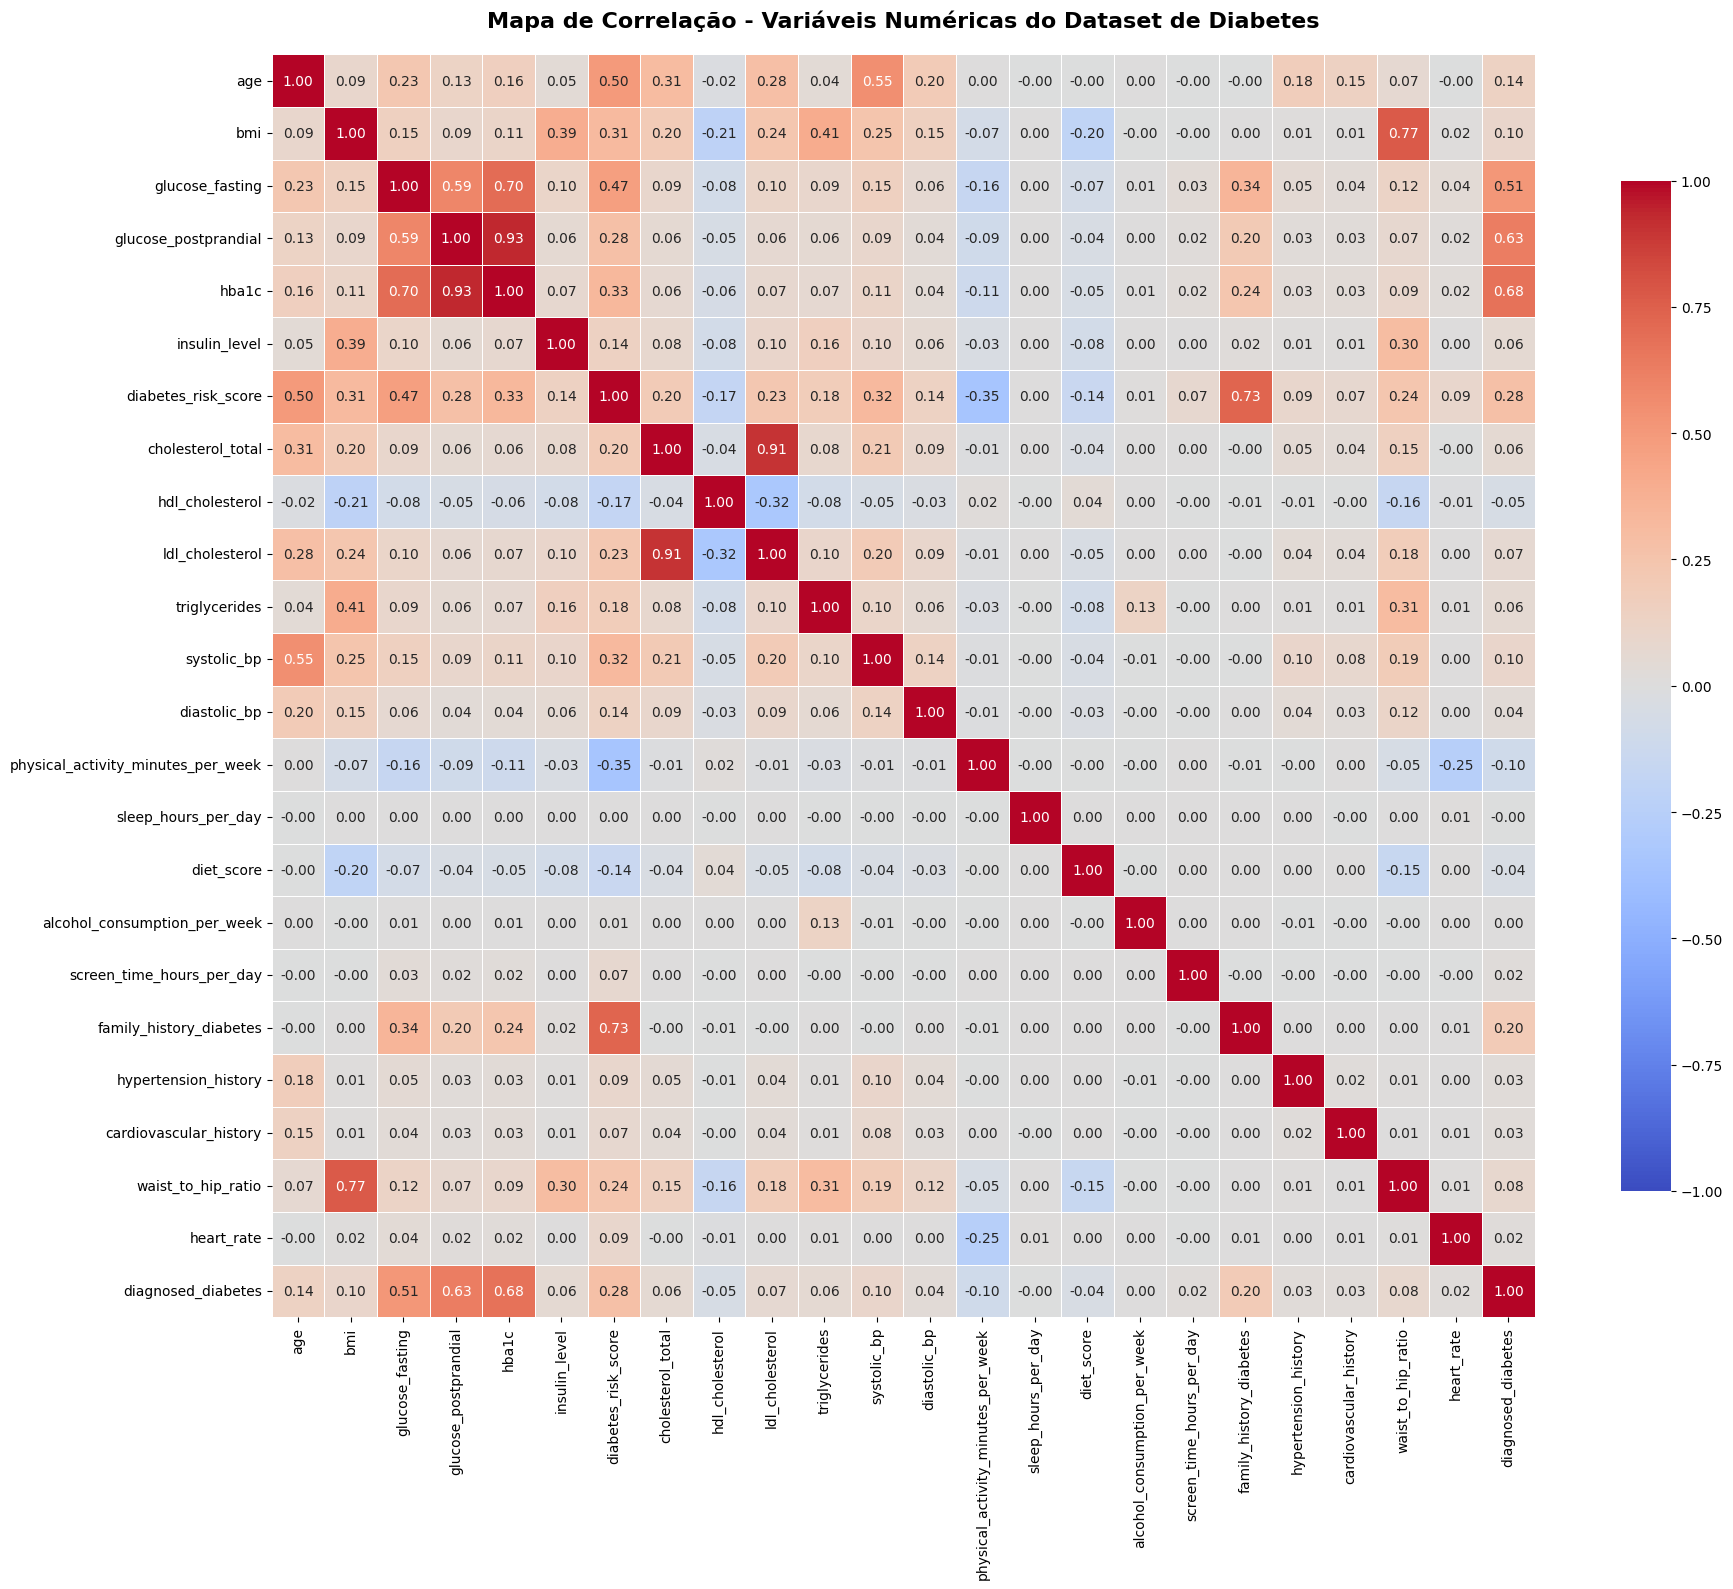


INTERPRETAÇÃO DO MAPA DE CORRELAÇÃO

O mapa de correlação utiliza o coeficiente de correlação de Pearson (r), que varia de -1 a +1:
  - r = +1: correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta)
  - r = 0: sem correlação linear
  - r = -1: correlação negativa perfeita (quando uma variável aumenta, a outra diminui)

Interpretação dos valores:
  - |r| >= 0.7: Correlação forte
  - 0.5 <= |r| < 0.7: Correlação moderada
  - 0.3 <= |r| < 0.5: Correlação fraca
  - |r| < 0.3: Correlação muito fraca ou inexistente


CORRELAÇÕES FORTES DETECTADAS (|r| >= 0.7)

bmi <-> waist_to_hip_ratio: r = 0.766
   Interpretação: Correlação positiva forte

glucose_fasting <-> hba1c: r = 0.700
   Interpretação: Correlação positiva forte

glucose_postprandial <-> hba1c: r = 0.933
   Interpretação: Correlação positiva forte

diabetes_risk_score <-> family_history_diabetes: r = 0.733
   Interpretação: Correlação positiva forte

cholesterol_total <-> ldl_cholesterol: r = 0.906
   In

In [9]:
# ANÁLISE DE CORRELAÇÃO - Mapa de Calor (Heatmap)

print("=" * 100)
print("ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS NUMÉRICAS")
print("=" * 100)

# Adicionar diagnosed_diabetes à lista se não estiver presente
if 'diagnosed_diabetes' not in numerical_cols:
    correlation_cols = numerical_cols + ['diagnosed_diabetes']
else:
    correlation_cols = numerical_cols

# Selecionar apenas variáveis numéricas
numerical_data = df[correlation_cols]

# Calcular matriz de correlação
correlation_matrix = numerical_data.corr()

# Criar figura para o heatmap
plt.figure(figsize=(20, 16))

# Criar heatmap com seaborn
sns.heatmap(correlation_matrix, 
            annot=True,  # Mostrar valores
            fmt='.2f',   # Formato com 2 casas decimais
            cmap='coolwarm',  # Esquema de cores (azul=negativo, vermelho=positivo)
            center=0,    # Centro em 0
            square=True, # Células quadradas
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)  # Escala de -1 a 1

plt.title('Mapa de Correlação - Variáveis Numéricas do Dataset de Diabetes', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("INTERPRETAÇÃO DO MAPA DE CORRELAÇÃO")
print("=" * 100)

print("""
O mapa de correlação utiliza o coeficiente de correlação de Pearson (r), que varia de -1 a +1:
  - r = +1: correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta)
  - r = 0: sem correlação linear
  - r = -1: correlação negativa perfeita (quando uma variável aumenta, a outra diminui)

Interpretação dos valores:
  - |r| >= 0.7: Correlação forte
  - 0.5 <= |r| < 0.7: Correlação moderada
  - 0.3 <= |r| < 0.5: Correlação fraca
  - |r| < 0.3: Correlação muito fraca ou inexistente
""")

# Encontrar correlações fortes (acima de 0.7 em valor absoluto)
print("\n" + "=" * 100)
print("CORRELAÇÕES FORTES DETECTADAS (|r| >= 0.7)")
print("=" * 100 + "\n")

strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strong_correlations.append((var1, var2, corr_value))
            print(f"{var1} <-> {var2}: r = {corr_value:.3f}")
            print(f"   Interpretação: Correlação {'positiva' if corr_value > 0 else 'negativa'} forte")
            print()

if not strong_correlations:
    print("Nenhuma correlação forte (|r| >= 0.7) detectada entre variáveis distintas.")
    print("Isso indica boa independência entre as features, o que é positivo para modelagem.\n")

# Encontrar correlações moderadas (entre 0.5 e 0.7)
print("\n" + "=" * 100)
print("CORRELAÇÕES MODERADAS DETECTADAS (0.5 <= |r| < 0.7)")
print("=" * 100 + "\n")

moderate_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.5 <= abs(corr_value) < 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            moderate_correlations.append((var1, var2, corr_value))

# Ordenar por valor absoluto de correlação
moderate_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

for var1, var2, corr_value in moderate_correlations:
    print(f"{var1} <-> {var2}: r = {corr_value:.3f}")

if not moderate_correlations:
    print("Nenhuma correlação moderada detectada.")

# Análise específica com a variável alvo (diagnosed_diabetes)
print("\n" + "=" * 100)
print("CORRELAÇÃO COM A VARIÁVEL ALVO (diagnosed_diabetes)")
print("=" * 100 + "\n")

target_correlations = correlation_matrix['diagnosed_diabetes'].sort_values(ascending=False)
print("Variáveis mais correlacionadas com diagnosed_diabetes:\n")

for var, corr in target_correlations.items():
    if var != 'diagnosed_diabetes':
        strength = "Forte" if abs(corr) >= 0.7 else "Moderada" if abs(corr) >= 0.5 else "Fraca" if abs(corr) >= 0.3 else "Muito fraca"
        direction = "positiva" if corr > 0 else "negativa"
        print(f"{var:40s}: r = {corr:6.3f}  [{strength} {direction}]")

print("\n" + "=" * 100)
print("ANÁLISE DETALHADA DAS PRINCIPAIS CORRELAÇÕES")
print("=" * 100)

print("""
1. VARIÁVEIS GLICÊMICAS (glucose_fasting, glucose_postprandial, hba1c):
   - Espera-se correlação FORTE entre essas variáveis, pois todas medem controle glicêmico
   - São marcadores diretos de diabetes
   - ATENÇÃO PARA MULTICOLINEARIDADE: Pode ser necessário usar apenas uma ou duas dessas
     variáveis no modelo final para evitar redundância

2. DIABETES_RISK_SCORE:
   - Provavelmente possui correlação forte com a variável alvo (diagnosed_diabetes)
   - Pode ser uma combinação linear de outras variáveis do dataset
   - CUIDADO: Usar este score junto com suas variáveis componentes pode causar "data leakage"

3. VARIÁVEIS ANTROPOMÉTRICAS (bmi, waist_to_hip_ratio):
   - Ambas medem obesidade/composição corporal
   - Correlação moderada esperada entre elas
   - waist_to_hip_ratio pode ser mais específico para diabetes (obesidade central)

4. PRESSÃO ARTERIAL (systolic_bp, diastolic_bp):
   - Geralmente possuem correlação moderada a forte entre si
   - Ambas relacionadas à hipertensão (comorbidade frequente em diabéticos)

5. COLESTEROL (cholesterol_total, hdl_cholesterol, ldl_cholesterol, triglycerides):
   - cholesterol_total é soma de HDL + LDL + (triglicerídeos/5)
   - Correlação matemática esperada
   - HDL e LDL costumam ter correlação negativa ou fraca
   - Triglicerídeos podem correlacionar com resistência insulínica

6. VARIÁVEIS DE ESTILO DE VIDA (physical_activity, screen_time, diet_score):
   - physical_activity e screen_time podem ter correlação negativa (sedentarismo)
   - diet_score pode correlacionar com outras variáveis de estilo de vida saudável

7. IDADE:
   - Correlação positiva esperada com diabetes (risco aumenta com idade)
   - Pode correlacionar com pressão arterial e outras comorbidades
""")

print("\n" + "=" * 100)
print("IMPLICAÇÕES PARA MACHINE LEARNING")
print("=" * 100)

print("""
1. MULTICOLINEARIDADE:
   - Variáveis fortemente correlacionadas (|r| > 0.8) podem causar problemas em:
     * Regressão Linear
     * Regressão Logística
     * Interpretabilidade dos coeficientes
   - Soluções:
     * Remover uma das variáveis correlacionadas
     * PCA (Principal Component Analysis)
     * Regularização (Ridge/Lasso)

2. SELEÇÃO DE FEATURES:
   - Priorizar variáveis com maior correlação absoluta com diagnosed_diabetes
   - Evitar incluir variáveis redundantes
   - Considerar métodos de seleção automática (RFE, feature importance)

3. FEATURE ENGINEERING:
   - Criar interações entre variáveis fracamente correlacionadas
   - Combinar informações complementares (ex: BMI + waist_to_hip_ratio)
   - Criar ratios ou índices compostos

4. MODELOS BASEADOS EM ÁRVORES:
   - Random Forest, XGBoost, LightGBM são mais robustos à multicolinearidade
   - Podem lidar melhor com variáveis correlacionadas
   - Úteis quando não queremos remover features

5. VALIDAÇÃO:
   - Usar cross-validation para avaliar impacto da multicolinearidade
   - Verificar VIF (Variance Inflation Factor) para regressão
   - Analisar feature importance para identificar redundâncias
""")

print("\n" + "=" * 100)
print("RECOMENDAÇÕES PARA PRÓXIMAS ETAPAS")
print("=" * 100)

print("""
1. INVESTIGAR MULTICOLINEARIDADE:
   - Calcular VIF (Variance Inflation Factor) para variáveis com |r| > 0.7
   - VIF > 10 indica multicolinearidade severa

2. FEATURE SELECTION:
   - Teste com e sem diabetes_risk_score (pode ser redundante)
   - Considere usar apenas HbA1c (marcador gold standard) em vez de todos marcadores glicêmicos
   - Avalie manter ou remover cholesterol_total (já que temos HDL e LDL)

3. ANÁLISE DE SUBGRUPOS:
   - Analise correlações separadamente para diabéticos vs não-diabéticos
   - Pode revelar padrões diferentes entre os grupos

4. TRANSFORMAÇÕES:
   - Variáveis com assimetria podem se beneficiar de transformação log
   - Considere padronização (StandardScaler) para modelos sensíveis à escala

5. EXPLORAÇÃO ADICIONAL:
   - Correlações não-lineares (Spearman, Kendall)
   - Análise de componentes principais (PCA)
   - Clustering para identificar subpopulações
""")

print("\n" + "=" * 100)

In [10]:
# ANÁLISE APROFUNDADA: CORRELAÇÃO vs CAUSALIDADE vs REDUNDÂNCIA

print("=" * 100)
print("CORRELAÇÃO ≠ CAUSALIDADE: ANÁLISE CRÍTICA DAS CORRELAÇÕES")
print("=" * 100)

# Preparar dados de correlação
if 'diagnosed_diabetes' not in numerical_cols:
    correlation_cols = numerical_cols + ['diagnosed_diabetes']
else:
    correlation_cols = numerical_cols

numerical_data = df[correlation_cols]
correlation_matrix = numerical_data.corr()

print("""
CONCEITOS FUNDAMENTAIS:

1. CORRELAÇÃO: Medida estatística que indica se duas variáveis variam juntas
   - Correlação positiva: ambas aumentam ou diminuem juntas
   - Correlação negativa: quando uma aumenta, a outra diminui
   - NÃO implica que uma causa a outra!

2. CAUSALIDADE: Relação de causa e efeito - uma variável CAUSA mudança na outra
   - Requer evidência experimental ou mecanismo biológico conhecido
   - Correlação é apenas um dos muitos critérios para inferir causalidade

3. REDUNDÂNCIA: Duas variáveis medem essencialmente a mesma coisa
   - Multicolinearidade em modelos estatísticos
   - Uma variável pode ser removida sem perda de informação
""")

print("\n" + "=" * 100)
print("TIPO 1: CORRELAÇÕES REDUNDANTES (Uma explica a outra)")
print("=" * 100 + "\n")

print("Variáveis que medem o mesmo fenômeno de formas diferentes:\n")

# Encontrar pares com correlação muito forte
redundant_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= 0.75:  # Correlação muito forte
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            redundant_pairs.append((var1, var2, corr_value))

# Ordenar por correlação
redundant_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

if redundant_pairs:
    for var1, var2, corr in redundant_pairs:
        print(f"► {var1} <-> {var2}")
        print(f"  Correlação: r = {corr:.3f}")
        
        # Análise específica de redundância
        if 'glucose' in var1 and 'glucose' in var2:
            print("  REDUNDÂNCIA: Ambas medem glicemia (mesma substância, momentos diferentes)")
            print("  RECOMENDAÇÃO: Usar apenas uma OU criar variável composta (média, diferença)")
        
        elif 'glucose' in var1 and 'hba1c' in var2:
            print("  PARCIALMENTE REDUNDANTE: HbA1c reflete média de glicose dos últimos 2-3 meses")
            print("  RECOMENDAÇÃO: HbA1c é marcador gold standard - pode substituir glicemias pontuais")
        
        elif 'glucose' in var2 and 'hba1c' in var1:
            print("  PARCIALMENTE REDUNDANTE: HbA1c reflete média de glicose dos últimos 2-3 meses")
            print("  RECOMENDAÇÃO: HbA1c é marcador gold standard - pode substituir glicemias pontuais")
        
        elif 'bp' in var1 and 'bp' in var2:
            print("  PARCIALMENTE REDUNDANTE: Sistólica e diastólica medem aspectos do mesmo fenômeno")
            print("  RECOMENDAÇÃO: Ambas têm valor clínico distinto - considerar manter ambas")
        
        elif 'cholesterol' in var1 and 'cholesterol' in var2:
            print("  REDUNDÂNCIA PARCIAL: Colesterol total é soma de HDL + LDL + triglicerídeos/5")
            print("  RECOMENDAÇÃO: Usar apenas HDL + LDL (informação mais específica)")
        
        elif 'diabetes_risk_score' in var1 or 'diabetes_risk_score' in var2:
            print("  ATENÇÃO: Risk score é calculado a partir de outras variáveis do dataset!")
            print("  REDUNDÂNCIA GRAVE: Usar risk score + suas componentes = MULTICOLINEARIDADE")
            print("  RECOMENDAÇÃO: Remover risk score OU usar apenas ele (sem componentes)")
        
        else:
            print("  REDUNDÂNCIA: Forte correlação indica que medem fenômenos muito relacionados")
            print("  RECOMENDAÇÃO: Considerar remover uma das variáveis ou criar feature composta")
        
        print()
else:
    print("Nenhuma correlação redundante forte (|r| >= 0.75) detectada.")
    print("Isso indica boa independência entre features.\n")

print("\n" + "=" * 100)
print("TIPO 2: CORRELAÇÕES COM POSSÍVEL CAUSALIDADE DIRETA")
print("=" * 100 + "\n")

print("Variáveis onde existe MECANISMO BIOLÓGICO conhecido de causa-efeito:\n")

# Analisar correlações com diagnosed_diabetes
target_corrs = correlation_matrix['diagnosed_diabetes'].sort_values(ascending=False)

causal_explanations = {
    'hba1c': {
        'direction': 'CAUSAL',
        'mechanism': 'HbA1c ELEVADA É CONSEQUÊNCIA de glicose cronicamente alta → diabetes',
        'type': 'Marcador diagnóstico direto',
        'note': 'HbA1c ≥ 6.5% é critério diagnóstico oficial de diabetes'
    },
    'glucose_fasting': {
        'direction': 'CAUSAL',
        'mechanism': 'Glicose em jejum elevada É O PRÓPRIO DIABETES',
        'type': 'Marcador diagnóstico direto',
        'note': 'Glicemia jejum ≥ 126 mg/dL = diagnóstico de diabetes'
    },
    'glucose_postprandial': {
        'direction': 'CAUSAL',
        'mechanism': 'Glicose pós-refeição elevada indica resistência insulínica',
        'type': 'Marcador diagnóstico direto',
        'note': 'Glicemia 2h ≥ 200 mg/dL = diagnóstico de diabetes'
    },
    'insulin_level': {
        'direction': 'CAUSAL BIDIRECIONAL',
        'mechanism': 'Resistência insulínica CAUSA diabetes tipo 2',
        'type': 'Mecanismo fisiopatológico',
        'note': 'Insulina alta → compensação por resistência → pâncreas falha → diabetes'
    },
    'bmi': {
        'direction': 'CAUSAL (fator de risco)',
        'mechanism': 'Obesidade CAUSA resistência insulínica → diabetes tipo 2',
        'type': 'Fator de risco modificável',
        'note': 'Mecanismo: gordura visceral libera citocinas inflamatórias'
    },
    'waist_to_hip_ratio': {
        'direction': 'CAUSAL (fator de risco)',
        'mechanism': 'Obesidade CENTRAL (abdominal) causa resistência insulínica',
        'type': 'Fator de risco modificável',
        'note': 'Gordura visceral é metabolicamente mais ativa que subcutânea'
    },
    'physical_activity_minutes_per_week': {
        'direction': 'CAUSAL PROTETOR',
        'mechanism': 'Exercício MELHORA sensibilidade à insulina → previne diabetes',
        'type': 'Fator protetor modificável',
        'note': 'Mecanismo: músculo ativo consome glicose sem precisar de insulina (GLUT4)'
    },
    'age': {
        'direction': 'CAUSAL (fator de risco)',
        'mechanism': 'Envelhecimento REDUZ função pancreática e sensibilidade insulínica',
        'type': 'Fator de risco não modificável',
        'note': 'Processo fisiológico: declínio progressivo da função beta-pancreática'
    },
    'family_history_diabetes': {
        'direction': 'CAUSAL (genética)',
        'mechanism': 'Genes herdados PREDISPÕEM a diabetes',
        'type': 'Fator de risco não modificável',
        'note': 'Múltiplos genes envolvidos (poligênica) + ambiente'
    }
}

for var, corr in target_corrs.items():
    if var != 'diagnosed_diabetes' and abs(corr) >= 0.3:  # Correlações relevantes
        print(f"► {var}")
        print(f"  Correlação com diabetes: r = {corr:.3f}")
        
        if var in causal_explanations:
            exp = causal_explanations[var]
            print(f"  TIPO: {exp['direction']}")
            print(f"  MECANISMO: {exp['mechanism']}")
            print(f"  NATUREZA: {exp['type']}")
            print(f"  NOTA: {exp['note']}")
        else:
            print(f"  ATENÇÃO: Correlação detectada, mas mecanismo causal não está claro")
            print(f"  Pode ser: (1) relação indireta, (2) variável confundidora, (3) acaso")
        
        print()

print("\n" + "=" * 100)
print("TIPO 3: CORRELAÇÕES ESPÚRIAS (Variável Confundidora - Exemplo Clássico)")
print("=" * 100 + "\n")

print("""
EXEMPLO FAMOSO: Sorvete e Afogamentos
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Dados observacionais mostram:
  📊 Quando vendas de sorvete aumentam → afogamentos aumentam
  📊 Correlação positiva forte (r ≈ 0.7)

CONCLUSÃO ERRADA: "Consumir sorvete causa afogamentos!"

CONCLUSÃO CORRETA:
  ☀️  TEMPERATURA (variável confundidora) causa AMBOS:
      - Calor → pessoas compram mais sorvete
      - Calor → pessoas nadam mais → mais afogamentos
  
  🔍 Sorvete e afogamentos NÃO têm relação causal direta
  🔍 Apenas compartilham uma CAUSA COMUM (temperatura)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Como identificar correlações espúrias:
  1. Perguntar: "Existe mecanismo biológico/físico plausível?"
  2. Buscar variáveis confundidoras óbvias
  3. Fazer análise temporal (causa vem antes do efeito?)
  4. Controlar por outras variáveis (análise multivariada)
""")

print("\n" + "=" * 100)
print("EXEMPLOS DE POSSÍVEIS CONFUNDIDORES NO NOSSO DATASET")
print("=" * 100 + "\n")

print("""
1. IDADE como confundidora:
   ─────────────────────────
   Observação: Pressão alta correlaciona com diabetes
   
   MAS: Idade aumenta risco de AMBOS
        Idade → Hipertensão
        Idade → Diabetes
   
   Portanto: Parte da correlação entre hipertensão e diabetes 
             é explicada pela idade (confundidora)


2. OBESIDADE como confundidora:
   ────────────────────────────
   Observação: Hipertensão correlaciona com diabetes
   
   MAS: Obesidade causa AMBOS
        Obesidade → Hipertensão (sobrecarga cardiovascular)
        Obesidade → Diabetes (resistência insulínica)
   
   Portanto: Hipertensão e diabetes podem não ter relação causal direta,
             mas compartilham causa comum (obesidade)


3. SEDENTARISMO como confundidora:
   ──────────────────────────────
   Observação: Screen time alto correlaciona com diabetes
   
   MAS: Sedentarismo explica ambos
        Sedentarismo → Muito tempo de tela
        Sedentarismo → Diabetes (falta de exercício)
   
   Portanto: Não é a "tela" que causa diabetes, mas o estilo de vida sedentário


4. SÍNDROME METABÓLICA (cluster de fatores):
   ──────────────────────────────────────────
   Observação: Colesterol, triglicerídeos, pressão alta todos correlacionam
   
   MAS: Todos fazem parte da SÍNDROME METABÓLICA
        Resistência insulínica → Diabetes
        Resistência insulínica → Dislipidemia
        Resistência insulínica → Hipertensão
   
   Portanto: Não são causas independentes, mas manifestações da mesma doença base
""")

print("\n" + "=" * 100)
print("CRITÉRIOS DE BRADFORD HILL PARA INFERIR CAUSALIDADE")
print("=" * 100 + "\n")

print("""
Para concluir que A → B (A causa B), não basta correlação. Avalie:

1. ⏰ TEMPORALIDADE: A causa vem antes do efeito?
   Ex: Obesidade na juventude → Diabetes na meia-idade ✓
   
2. 💪 FORÇA: Quanto maior a correlação, mais provável a causalidade
   Ex: HbA1c tem r ≈ 0.9 com diabetes → forte evidência
   
3. 📈 GRADIENTE DOSE-RESPOSTA: Mais exposição = mais efeito?
   Ex: Quanto maior o IMC → maior o risco de diabetes ✓
   
4. 🔬 PLAUSIBILIDADE BIOLÓGICA: Existe mecanismo conhecido?
   Ex: Gordura visceral libera citocinas inflamatórias → resistência insulínica ✓
   
5. 🔄 CONSISTÊNCIA: Resultado se repete em diferentes estudos?
   Ex: Relação obesidade-diabetes observada em centenas de estudos ✓
   
6. 🧪 EXPERIMENTO: Estudo randomizado controlado confirma?
   Ex: Intervenção com exercício reduz diabetes → evidência causal forte ✓
   
7. 📊 ESPECIFICIDADE: A causa leva a um efeito específico?
   Ex: HbA1c alta é específica para problemas glicêmicos ✓
   
8. 🔁 REVERSIBILIDADE: Remover causa remove efeito?
   Ex: Perda de peso reduz incidência de diabetes ✓

Quanto mais critérios satisfeitos, mais forte a evidência de causalidade.
""")

print("\n" + "=" * 100)
print("IMPLICAÇÕES PRÁTICAS PARA MACHINE LEARNING")
print("=" * 100 + "\n")

print("""
1. MODELOS PREDITIVOS (nosso caso):
   ──────────────────────────────────
   ✓ Correlação é SUFICIENTE para predição
   ✓ Não precisamos entender causalidade para fazer boas predições
   ✓ EXEMPLO: Temperatura prevê vendas de sorvete (mesmo sem causalidade direta)
   
   CUIDADO:
   ✗ Modelo pode falhar se variável confundidora mudar
   ✗ Ex: Modelo treinado no verão pode errar no inverno


2. INTERVENÇÕES E POLÍTICAS PÚBLICAS:
   ───────────────────────────────────
   ✗ Correlação NÃO é suficiente para decidir intervenções
   ✓ Precisa de evidência causal forte
   
   EXEMPLO ERRADO: "Vamos reduzir screen time para prevenir diabetes"
   ➜ Pode não funcionar se sedentarismo é a causa real
   
   EXEMPLO CERTO: "Vamos promover exercício físico para prevenir diabetes"
   ➜ Evidência causal forte de múltiplos estudos


3. FEATURE ENGINEERING:
   ─────────────────────
   ✓ Variáveis redundantes devem ser removidas ou combinadas
   ✓ Variáveis causalmente relacionadas podem ser mantidas
   ✓ Considerar criar features de interação entre confundidores
   
   EXEMPLO: Criar feature BMI × Age (obesidade em diferentes idades)


4. INTERPRETABILIDADE:
   ───────────────────
   ⚠️  Coeficientes do modelo NÃO são efeitos causais
   ⚠️  Importância de features ≠ importância causal
   ✓ Sempre qualificar interpretações com "associado a" não "causa"
   
   ERRADO: "Modelo mostra que screen time causa diabetes"
   CERTO: "Modelo mostra que screen time está associado a diabetes"
""")

print("\n" + "=" * 100)
print("RESUMO EXECUTIVO")
print("=" * 100 + "\n")

print("""
┌─────────────────────────────────────────────────────────────────────┐
│ CORRELAÇÃO                                                          │
├─────────────────────────────────────────────────────────────────────┤
│ • Mede se duas variáveis variam juntas                             │
│ • Varia de -1 (correlação negativa) a +1 (correlação positiva)    │
│ • SUFICIENTE para: Predição, identificar padrões                   │
│ • INSUFICIENTE para: Inferir causa, decidir intervenções           │
└─────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────┐
│ REDUNDÂNCIA (Multicolinearidade)                                    │
├─────────────────────────────────────────────────────────────────────┤
│ • Duas variáveis medem essencialmente o mesmo fenômeno             │
│ • Exemplo: glucose_fasting + glucose_postprandial + hba1c          │
│ • PROBLEMA: Causa instabilidade em modelos de regressão            │
│ • SOLUÇÃO: Remover uma variável ou usar PCA/regularização          │
└─────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────┐
│ CAUSALIDADE                                                         │
├─────────────────────────────────────────────────────────────────────┤
│ • A causa B se mudança em A → mudança em B                         │
│ • Requer: Temporalidade, mecanismo, experimentos                   │
│ • NECESSÁRIO para: Intervenções, políticas, entender fenômeno      │
│ • CUIDADO: Correlação forte NÃO implica causalidade                │
└─────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────┐
│ VARIÁVEIS CONFUNDIDORAS                                             │
├─────────────────────────────────────────────────────────────────────┤
│ • Terceira variável que causa ambas                                │
│ • Exemplo: Temperatura causa sorvete E afogamentos                 │
│ • PROBLEMA: Cria correlação espúria (falsa)                        │
│ • SOLUÇÃO: Análise multivariada, controlar confundidores           │
└─────────────────────────────────────────────────────────────────────┘

MENSAGEM FINAL:
═══════════════
Correlação é ferramenta poderosa para PREDIÇÃO, mas para AÇÃO requer 
análise cuidadosa de causalidade e possíveis confundidores.

Em nosso dataset:
✓ HbA1c, glicemias → correlação CAUSAL com diabetes (marcadores diretos)
✓ BMI, obesidade central → correlação CAUSAL (fator de risco)
✓ Idade → confundidora de várias relações
⚠️  diabetes_risk_score → redundante com outras features
⚠️  Colesterol total → redundante com HDL + LDL
""")

CORRELAÇÃO ≠ CAUSALIDADE: ANÁLISE CRÍTICA DAS CORRELAÇÕES

CONCEITOS FUNDAMENTAIS:

1. CORRELAÇÃO: Medida estatística que indica se duas variáveis variam juntas
   - Correlação positiva: ambas aumentam ou diminuem juntas
   - Correlação negativa: quando uma aumenta, a outra diminui
   - NÃO implica que uma causa a outra!

2. CAUSALIDADE: Relação de causa e efeito - uma variável CAUSA mudança na outra
   - Requer evidência experimental ou mecanismo biológico conhecido
   - Correlação é apenas um dos muitos critérios para inferir causalidade

3. REDUNDÂNCIA: Duas variáveis medem essencialmente a mesma coisa
   - Multicolinearidade em modelos estatísticos
   - Uma variável pode ser removida sem perda de informação


TIPO 1: CORRELAÇÕES REDUNDANTES (Uma explica a outra)

Variáveis que medem o mesmo fenômeno de formas diferentes:

► glucose_postprandial <-> hba1c
  Correlação: r = 0.933
  PARCIALMENTE REDUNDANTE: HbA1c reflete média de glicose dos últimos 2-3 meses
  RECOMENDAÇÃO: HbA1c é m